In [4]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer
import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
 
root_dir =r"C:\Users\soff1\Desktop\Nouveaudossier" 
# get all the folder paths
all_paths = os.listdir(root_dir)

# create a DataFrame
data = pd.DataFrame()

images = []
labels = []
counter = 0
V=""

#Parcourir les dossiers

for folder_pathee in tqdm(all_paths, total=len(all_paths)):
    
    V = folder_pathee
    root_dir2 ="C:/Users/soff1/Desktop/Nouveaudossier/"+ folder_pathee
    all_paths2 = os.listdir(root_dir2)
    
    for folder_path in tqdm(all_paths2, total=len(all_paths2)):
        # get all the image names in the particular folder
        image_paths = os.listdir(f"{root_dir2}/{folder_path}")
        # get the folder as label(number and name of folder)

        label = folder_path


        if label == 'Z':
            continue

        #recognize images and save image paths in the DataFrame
        for image_path in image_paths:
            if ((image_path.split('.')[-1] == 'jpg') or (image_path.split('.')[-1] == 'png')):



                image1 = load_img("C:/Users/soff1/Desktop/Nouveaudossier/"+folder_pathee+'/'+folder_path+'/'+image_path)

                im = Image.open("C:/Users/soff1/Desktop/Nouveaudossier/"+folder_pathee+'/'+folder_path+'/'+image_path)
                width, height = im.size



                data.loc[counter, 'image_path'] = f"{root_dir}/{folder_pathee}/{folder_path}/{image_path}"
                data.loc[counter, 'Class']=f"{label}"
                data.loc[counter, 'Category'] = f"{V}"
                data.loc[counter, 'Width'] = width
                data.loc[counter, 'Height'] = height
                data.loc[counter, 'Surface'] = height*width




                labels.append(label)
                counter += 1

labels = np.array(labels)
# one-hot encode the labels
#lb = LabelBinarizer()
#labels = lb.fit_transform(labels)

# add the image labels to the dataframe
#for i in range(len(labels)):
   # index = np.argmax(labels[i])
   # data.loc[i, 'target'] = int(index)
    
 
    
    
    
    
# shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

#print(f"Number of labels or classes: {len(lb.classes_)}")
#print(f"The first one hot encoded labels: {labels[0]}")
#print(f"Mapping the first one hot encoded label to its category: {lb.classes_[0]}")
print(f"Total instances: {len(data)}")
 
# save as CSV file
data.to_csv('data.csv', index=False)
 
print(data.head(5))

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:54<00:00, 78.19s/it]


Total instances: 43808
                                          image_path      Class Category  \
0  C:\Users\soff1\Desktop\Nouveaudossier/animal/C...  Crocodile   animal   
1  C:\Users\soff1\Desktop\Nouveaudossier/food/Jui...      Juice     food   
2  C:\Users\soff1\Desktop\Nouveaudossier/food/egg...        egg     food   
3  C:\Users\soff1\Desktop\Nouveaudossier/animal/D...       Duck   animal   
4  C:\Users\soff1\Desktop\Nouveaudossier/food/Sna...      Snack     food   

    Width  Height    Surface  
0  1024.0   683.0   699392.0  
1  1024.0  1024.0  1048576.0  
2  1024.0   819.0   838656.0  
3  1024.0   704.0   720896.0  
4  1024.0   759.0   777216.0  


In [5]:
for i in range(len(data)):
    print(data['Class'][i])

Crocodile
Juice
egg
Duck
Snack
Drink
Wok
Pillow
Tire
Coffee table
Headphones
Chicken
Scissors
Sushi
Bee
Umbrella
Woman
Dog
Trousers
Houseplant
Headphones
Box
Drink
Seafood
Box
Mobile phone
Bird
Person
Sunglasses
Mixing bowl
Clothing
Book
Waffle
Swim cap
Pen
Houseplant
Cat
Washing machine
food
Mug
Bicycle
Wine
Tiara
Fish
Window
Sun hat
Rugby ball
Zebra
Sports uniform
Television
Skateboard
Candy
Bottle
Bird
Segway
Tie
Sandal
Banana
Car
Backpack
Bed
Umbrella
Woman
Zucchini
Washing machine
Sandal
Roller skates
Desk
Flowerpot
Van
Tennis ball
Mushroom
Knife
Jacket
Jug
Grape
Football
Segway
Sunglasses
Watermelon
Watercraft
Countertop
Chair
Violin
Toy
Coffee table
Zebra
Grape
Antelope
Houseplant
Jeans
Bicycle
Coffee cup
Seat belt
Rose
Camera
Trombone
Tart
Picture frame
Ipod
Spoon
Mixing bowl
Skateboard
Clothing
Furniture
Chair
Light bulb
Paper towel
Pen
Skateboard
Tie
Sandwich
Chicken
Vase
Ruler
Fruit
Shelf
Jug
Ruler
Spoon
Bus
Scale
Picnic basket
Cat
Zucchini
Cattle
Milk
Computer keyboard
Dres

In [6]:
data.head()

,image_path,Class,Category,Width,Height,Surface
0,C:\Users\soff1\Desktop\Nouveaudossier/animal/C...,Crocodile,animal,1024.0,683.0,699392.0
1,C:\Users\soff1\Desktop\Nouveaudossier/food/Jui...,Juice,food,1024.0,1024.0,1048576.0
2,C:\Users\soff1\Desktop\Nouveaudossier/food/egg...,egg,food,1024.0,819.0,838656.0
3,C:\Users\soff1\Desktop\Nouveaudossier/animal/D...,Duck,animal,1024.0,704.0,720896.0
4,C:\Users\soff1\Desktop\Nouveaudossier/food/Sna...,Snack,food,1024.0,759.0,777216.0


In [7]:
data.describe()

,Width,Height,Surface
count,43808.000000,43808.000000,4.380800e+04
mean,960.562614,808.850096,7.670938e+05
std,145.879099,158.494897,3.039863e+05
min,256.000000,259.000000,2.621440e+05
25%,1024.000000,683.000000,6.993920e+05
50%,1024.000000,768.000000,7.731200e+05
75%,1024.000000,1024.000000,7.864320e+05
max,6000.000000,5520.000000,2.400000e+07


In [8]:
#applied the sqrt on the surface 
d=np.sqrt(data['Width']*data['Height'])
d

0         836.296598
1        1024.000000
2         915.781633
3         849.055946
4         881.598548
            ...     
43803    1024.000000
43804     835.071254
43805     838.741915
43806     836.296598
43807     835.071254
Length: 43808, dtype: float64

C:\Users\soff1\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


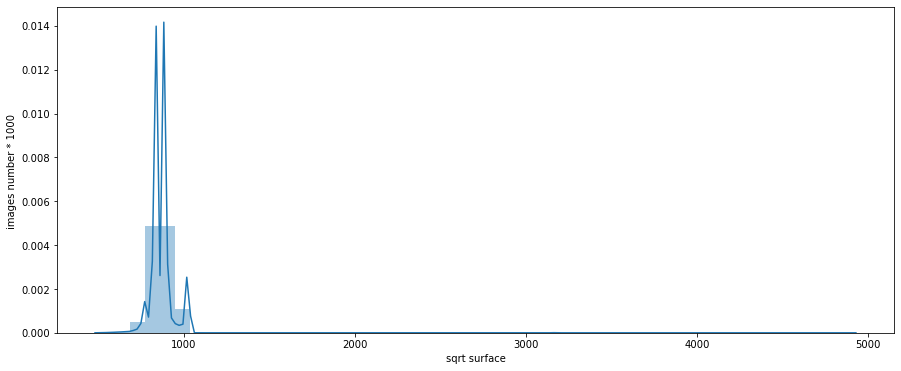

In [9]:
#d
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.distplot(d,bins=50, hist=True, kde=True)# displot pour faire hist eet plot hist rect et kde pente
plt.ylabel("images number * 1000 ")
plt.xlabel("sqrt surface")
plt.show()

<AxesSubplot:ylabel='Category'>

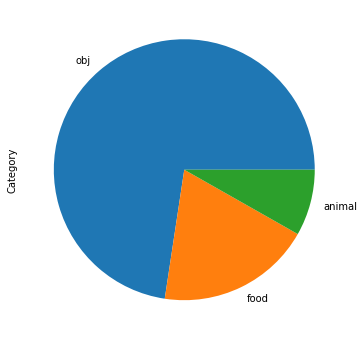

In [10]:
plt.figure(figsize=(15, 6))
data["Category"].value_counts().plot.pie()

In [19]:
dataframeanimals=data[data['Category']=='animal']
dataframeanimals

,image_path,Class,Category,Width,Height,Surface
0,C:\Users\soff1\Desktop\Nouveaudossier/animal/C...,Crocodile,animal,1024.0,683.0,699392.0
3,C:\Users\soff1\Desktop\Nouveaudossier/animal/D...,Duck,animal,1024.0,704.0,720896.0
11,C:\Users\soff1\Desktop\Nouveaudossier/animal/C...,Chicken,animal,1024.0,682.0,698368.0
14,C:\Users\soff1\Desktop\Nouveaudossier/animal/B...,Bee,animal,1024.0,685.0,701440.0
17,C:\Users\soff1\Desktop\Nouveaudossier/animal/D...,Dog,animal,1024.0,683.0,699392.0
...,...,...,...,...,...,...
43705,C:\Users\soff1\Desktop\Nouveaudossier/animal/L...,Lion,animal,1024.0,768.0,786432.0
43724,C:\Users\soff1\Desktop\Nouveaudossier/animal/C...,Cattle,animal,1024.0,1024.0,1048576.0
43740,C:\Users\soff1\Desktop\Nouveaudossier/animal/C...,Crocodile,animal,1024.0,768.0,786432.0
43757,C:\Users\soff1\Desktop\Nouveaudossier/animal/D...,Deer,animal,1024.0,683.0,699392.0


In [13]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} ')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


<ipython-input-13-72b89d682927>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


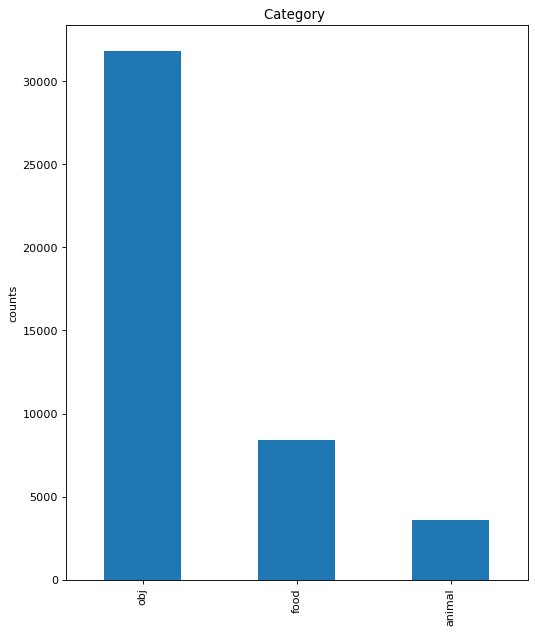

In [14]:
plotPerColumnDistribution(data,20,10) 

In [15]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix  ', fontsize=15)
    plt.show()

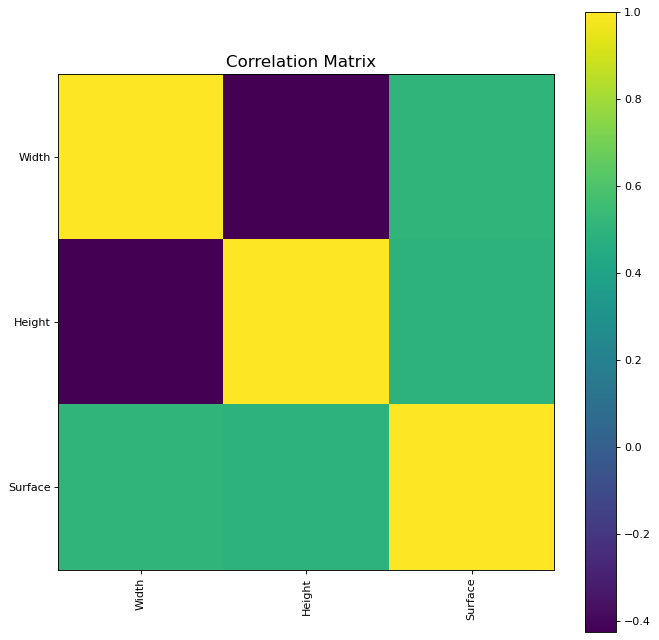

In [16]:
plotCorrelationMatrix(data, 10)

In [17]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

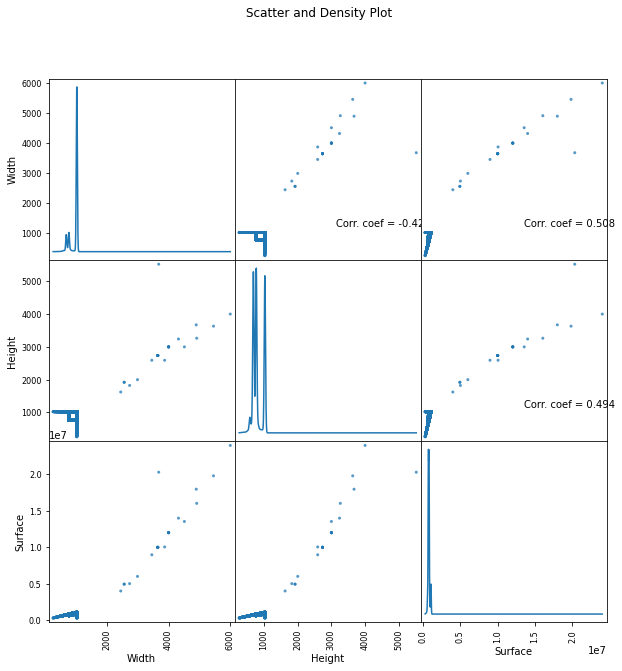

In [18]:
plotScatterMatrix(data, 10, 10)

<AxesSubplot:ylabel='Class'>

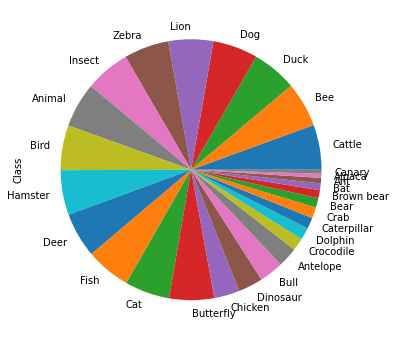

In [20]:
plt.figure(figsize=(15, 6))
dataframeanimals['Class'].value_counts().plot.pie()

In [22]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer
import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
 
root_dir =r"C:\Users\soff1\Desktop\Nouveaudossier\food" 
# get all the folder paths
all_paths = os.listdir(root_dir)

# create a DataFrame
dataframefood = pd.DataFrame()

images = []
labels = []
counter = 0
V=""

#Parcourir les dossiers

for folder_pathee in tqdm(all_paths, total=len(all_paths)):
    
    V = folder_pathee
    root_dir2 ="C:/Users/soff1/Desktop/Nouveaudossier/food/"+ folder_pathee
    all_paths2 = os.listdir(root_dir2)
    
    for folder_path in tqdm(all_paths2, total=len(all_paths2)):
        # get all the image names in the particular folder
        image_paths = os.listdir(f"{root_dir2}/{folder_path}")
        # get the folder as label(number and name of folder)

        label = folder_path


        if label == 'Z':
            continue

        #recognize images and save image paths in the DataFrame
        for image_path in image_paths:
            if ((image_path.split('.')[-1] == 'jpg') or (image_path.split('.')[-1] == 'png')):



                image1 = load_img("C:/Users/soff1/Desktop/Nouveaudossier/food/"+folder_pathee+'/'+folder_path+'/'+image_path)

                im = Image.open("C:/Users/soff1/Desktop/Nouveaudossier/food/"+folder_pathee+'/'+folder_path+'/'+image_path)
                width, height = im.size



                dataframefood.loc[counter, 'image_path'] = f"{root_dir}/{folder_pathee}/{folder_path}/{image_path}"
                dataframefood.loc[counter, 'Class']=f"{label}"
                dataframefood.loc[counter, 'Category'] = f"{V}"
                



                labels.append(label)
                counter += 1

labels = np.array(labels)
# one-hot encode the labels
#lb = LabelBinarizer()
#labels = lb.fit_transform(labels)

# add the image labels to the dataframe
#for i in range(len(labels)):
   # index = np.argmax(labels[i])
   # data.loc[i, 'target'] = int(index)
    
 
    
    
    
    


#print(f"Number of labels or classes: {len(lb.classes_)}")
#print(f"The first one hot encoded labels: {labels[0]}")
#print(f"Mapping the first one hot encoded label to its category: {lb.classes_[0]}")
print(f"Total instances: {len(data)}")
 

 
   

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.90s/it]

Total instances: 43808


<AxesSubplot:ylabel='Category'>

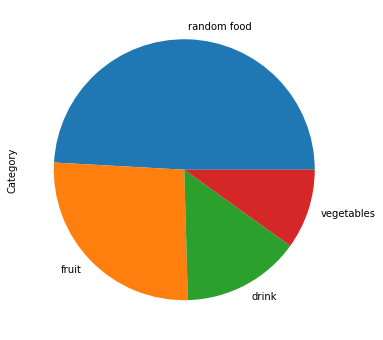

In [23]:
#Visualisations of fruits and vegetables
plt.figure(figsize=(15, 6))
dataframefood["Category"].value_counts().plot.pie()

In [24]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer
import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
 
root_dir =r"C:\Users\soff1\Desktop\Nouveaudossier\animal" 
# get all the folder paths
all_paths = os.listdir(root_dir)

# create a DataFrame
dataanimals = pd.DataFrame()

images = []
labels = []
counter = 0
V=""

#Parcourir les dossiers

for folder_pathee in tqdm(all_paths, total=len(all_paths)):
    
    V = folder_pathee
    root_dir2 ="C:/Users/soff1/Desktop/Nouveaudossier/animal/"+ folder_pathee
    all_paths2 = os.listdir(root_dir2)
    
    for folder_path in tqdm(all_paths2, total=len(all_paths2)):
        # get all the image names in the particular folder
        image_paths = os.listdir(f"{root_dir2}/{folder_path}")
        # get the folder as label(number and name of folder)

        label = folder_path


        if label == 'Z':
            continue

        #recognize images and save image paths in the DataFrame
        for image_path in image_paths:
            if ((image_path.split('.')[-1] == 'jpg') or (image_path.split('.')[-1] == 'png')):



                image1 = load_img("C:/Users/soff1/Desktop/Nouveaudossier/animal/"+folder_pathee+'/'+folder_path+'/'+image_path)

                im = Image.open("C:/Users/soff1/Desktop/Nouveaudossier/animal/"+folder_pathee+'/'+folder_path+'/'+image_path)
                width, height = im.size



                dataanimals.loc[counter, 'image_path'] = f"{root_dir}/{folder_pathee}/{folder_path}/{image_path}"
                dataanimals.loc[counter, 'Class']=f"{label}"
                dataanimals.loc[counter, 'Category'] = f"{V}"
                



                labels.append(label)
                counter += 1

labels = np.array(labels)
# one-hot encode the labels
#lb = LabelBinarizer()
#labels = lb.fit_transform(labels)

# add the image labels to the dataframe
#for i in range(len(labels)):
   # index = np.argmax(labels[i])
   # data.loc[i, 'target'] = int(index)
    
 
    
    
    
    


#print(f"Number of labels or classes: {len(lb.classes_)}")
#print(f"The first one hot encoded labels: {labels[0]}")
#print(f"Mapping the first one hot encoded label to its category: {lb.classes_[0]}")
print(f"Total instances: {len(data)}")
 

 
   

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.32s/it]

Total instances: 43808


<AxesSubplot:ylabel='Category'>

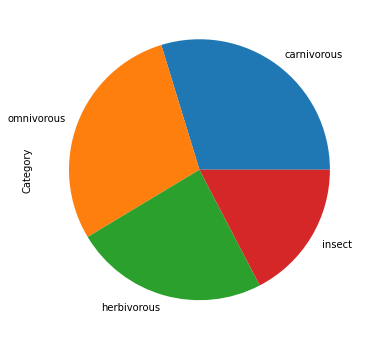

In [26]:
#Visualisations shapes
plt.figure(figsize=(15, 6))
dataanimals["Category"].value_counts().plot.pie()

In [2]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer
import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

root_dir =r"C:\Users\soff1\Desktop\esprit\4eme\semestre2\pi\genical\dataset\Sign Language" 
# get all the folder paths
all_paths = os.listdir(root_dir)

# create a DataFrame
datasign = pd.DataFrame()

images = []
labels = []
counter = 0
V=""

#Parcourir les dossiers
for folder_pathee in tqdm(all_paths, total=len(all_paths)):
    # get all the image names in the particular folder
    V = folder_pathee
    root_dir2 ="C:/Users/soff1/Desktop/esprit/4eme/semestre2/pi/genical/dataset/Sign Language/"+ folder_pathee
    all_paths2 = os.listdir(root_dir2)
    
        



    for folder_path in tqdm(all_paths2, total=len(all_paths2)):
        #recognize images and save image paths in the DataFrame
        image_paths = os.listdir(f"{root_dir2}/{folder_path}")
        # get the folder as label
        label = folder_path
        
        
        
        for image_path in image_paths:
            if ((image_path.split('.')[-1] == 'jpg') or (image_path.split('.')[-1] == 'png')):


                    



                image1 = load_img("C:/Users/soff1/Desktop/esprit/4eme/semestre2/pi/genical/dataset/Sign Language/"+folder_pathee+'/'+folder_path+'/'+image_path)

                im = Image.open("C:/Users/soff1/Desktop/esprit/4eme/semestre2/pi/genical/dataset/Sign Language/"+folder_pathee+'/'+folder_path+'/'+image_path)
                width, height = im.size



                datasign.loc[counter, 'image_path'] = f"{root_dir}/{folder_path}/{folder_path}/{image_path}"
                datasign.loc[counter, 'Class']=f"{label}"
                datasign.loc[counter, 'Category'] = f"{V}"
                datasign.loc[counter, 'Width'] = width
                datasign.loc[counter, 'Height'] = height
                datasign.loc[counter, 'Surface'] = height*width






                labels.append(label)
                counter += 1
            
labels = np.array(labels)
# one-hot encode the labels
#lb = LabelBinarizer()
#labels = lb.fit_transform(labels)

# add the image labels to the dataframe
#for i in range(len(labels)):
    #index = np.argmax(labels[i])
   # datasign.loc[i, 'target'] = int(index)
    
 
    
    
    
    
# shuffle the dataset
datasign = datasign.sample(frac=1).reset_index(drop=True)

#print(f"Number of labels or classes: {len(lb.classes_)}")
#print(f"The first one hot encoded labels: {labels[0]}")
#print(f"Mapping the first one hot encoded label to its category: {lb.classes_[0]}")
print(f"Total instances: {len(datasign)}")
 
# save as CSV file
datasign.to_csv('datasign.csv', index=False)
 
print(datasign.head(5))

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [07:40<00:00, 153.58s/it]


Total instances: 60743
                                          image_path  Class   Category  Width  \
0  C:\Users\soff1\Desktop\esprit\4eme\semestre2\p...      1    numbers   75.0   
1  C:\Users\soff1\Desktop\esprit\4eme\semestre2\p...      r  alphabets   56.0   
2  C:\Users\soff1\Desktop\esprit\4eme\semestre2\p...      c  alphabets  100.0   
3  C:\Users\soff1\Desktop\esprit\4eme\semestre2\p...      t  alphabets   75.0   
4  C:\Users\soff1\Desktop\esprit\4eme\semestre2\p...  peace      words  240.0   

   Height  Surface  
0   100.0   7500.0  
1   100.0   5600.0  
2    56.0   5600.0  
3   100.0   7500.0  
4   195.0  46800.0  


In [3]:
for i in range(len(datasign)):
    print(datasign['Class'][i])

1
r
c
t
peace
i
q
8
k
8
o
q
rock_on
up
4
2
x
3
v
0
p
y
z
e
3
o
i
k
peace
s
a
z
3
m
4
8
9
e
l
7
a
4
c
r
m
7
f
y
2
q
1
k
rock
1
unknown
j
l
y
2
d
z
4
unknown
7
y
thumbs
s
c
m
g
h
x
s
8
9
s
rock
n
m
y
r
call_me
k
t
f
0
n
b
h
unknown
9
n
c
k
q
2
g
l
j
9
i
up
r
a
n
scissor
7
f
5
q
unknown
rock_on
scissor
0
l
8
4
6
h
p
o
m
m
f
6
j
v
5
7
8
4
v
k
v
n
4
y
8
unknown
q
4
b
x
i
8
6
v
w
scissor
v
3
o
z
y
thumbs
a
x
n
f
t
j
5
r
k
7
j
b
b
1
1
n
k
3
l
3
6
x
c
n
a
0
v
4
e
z
r
9
x
p
u
k
n
r
9
n
y
r
0
8
x
4
l
w
j
y
d
d
rock_on
p
1
3
3
2
f
okay
s
r
7
y
up
m
l
c
5
o
up
g
5
okay
c
v
up
a
n
b
t
4
up
unknown
d
d
y
rock
q
k
y
5
4
v
call_me
3
v
j
8
paper
c
w
a
v
2
2
8
z
9
c
c
s
4
okay
i
rock
z
w
rock_on
d
a
v
b
e
2
up
t
1
x
k
8
j
2
w
z
j
0
9
g
7
t
d
c
peace
i
7
k
m
t
e
unknown
5
r
6
m
1
f
l
q
5
j
6
d
m
o
5
y
f
m
9
3
a
w
fingers_crossed
4
1
t
2
v
unknown
5
d
d
b
x
u
h
1
3
8
o
n
7
s
j
9
s
z
8
h
z
d
s
b
g
t
o
m
0
1
g
8
n
u
d
v
scissor
h
9
b
7
j
x
f
z
fingers_crossed
h
c
r
i
h
u
8
4
rock_on
j
rock
6
4
z
q
p
z
m
d
6

In [4]:
datasign.head()

,image_path,Class,Category,Width,Height,Surface
0,C:\Users\soff1\Desktop\esprit\4eme\semestre2\p...,1,numbers,75.0,100.0,7500.0
1,C:\Users\soff1\Desktop\esprit\4eme\semestre2\p...,r,alphabets,56.0,100.0,5600.0
2,C:\Users\soff1\Desktop\esprit\4eme\semestre2\p...,c,alphabets,100.0,56.0,5600.0
3,C:\Users\soff1\Desktop\esprit\4eme\semestre2\p...,t,alphabets,75.0,100.0,7500.0
4,C:\Users\soff1\Desktop\esprit\4eme\semestre2\p...,peace,words,240.0,195.0,46800.0


In [5]:
datasign.describe()

,Width,Height,Surface
count,60743.00000,60743.000000,60743.000000
mean,105.94536,83.353078,10081.614342
std,43.15175,40.574879,11419.838790
min,26.00000,26.000000,2600.000000
25%,100.00000,56.000000,5600.000000
50%,100.00000,59.000000,5900.000000
75%,100.00000,100.000000,7500.000000
max,240.00000,211.000000,46800.000000


In [6]:
ds=np.sqrt(datasign['Width']*datasign['Height'])
ds

0         86.602540
1         74.833148
2         74.833148
3         86.602540
4        216.333077
            ...    
60738     79.372539
60739     76.811457
60740     74.833148
60741     76.811457
60742     74.833148
Length: 60743, dtype: float64

C:\Users\soff1\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


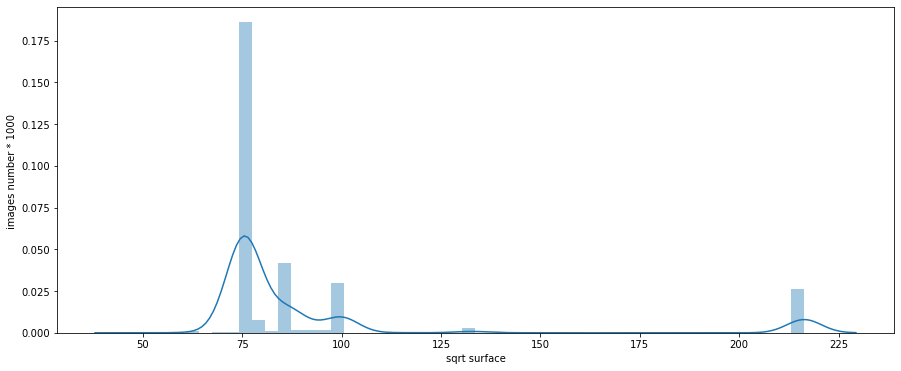

In [7]:
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.distplot(ds,bins=50, hist=True, kde=True)# displot pour faire hist eet plot hist rect et kde pente
plt.ylabel("images number * 1000 ")
plt.xlabel("sqrt surface")
plt.show()

<AxesSubplot:ylabel='Category'>

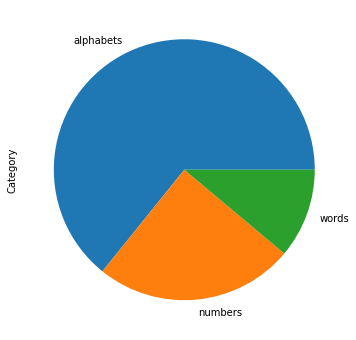

In [8]:
plt.figure(figsize=(15, 6))
datasign["Category"].value_counts().plot.pie()


In [9]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} ')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [10]:
Alphabetsign=datasign[datasign['Category']=='Alphabets']
Alphabetsign

,image_path,Class,Category,Width,Height,Surface


<ipython-input-9-72b89d682927>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-9-72b89d682927>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


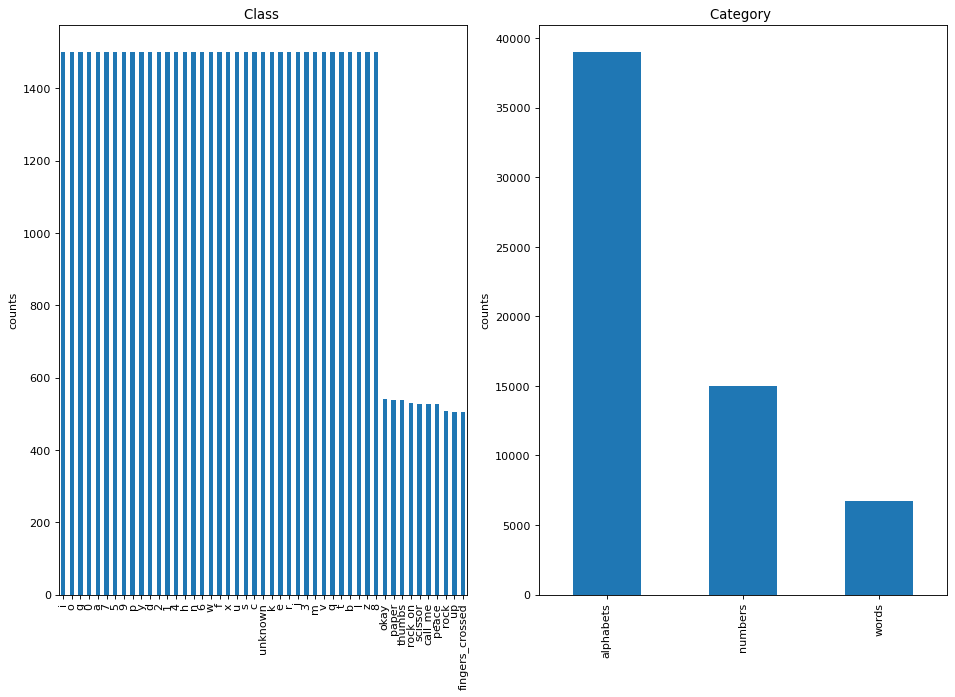

In [11]:
plotPerColumnDistribution(datasign,20,10) 

In [12]:
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix  ', fontsize=15)
    plt.show()

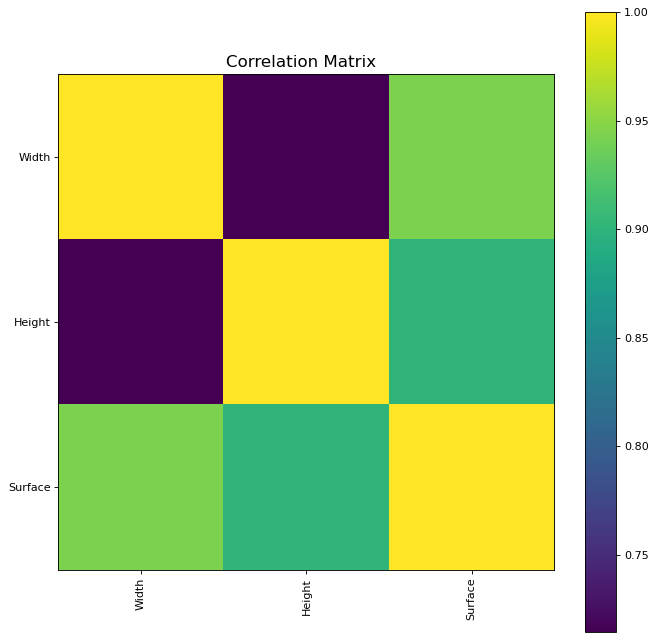

In [13]:
plotCorrelationMatrix(datasign, 10)

# DATA PREPARATION

## duplication


In [108]:
files_list = os.listdir()
print(len(files_list))

267


In [109]:

import hashlib
from imageio import imread
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time
import numpy as np

def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()
    

os.chdir('C:/Users/soff1/Desktop/data')
os.getcwd()

  
    
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))
        

In [110]:
duplicates

[(3, 2),
 (12, 11),
 (51, 50),
 (65, 64),
 (83, 82),
 (97, 96),
 (156, 155),
 (159, 158),
 (160, 158),
 (261, 260)]

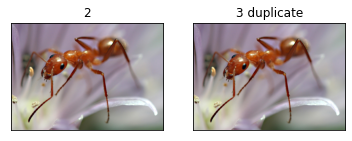

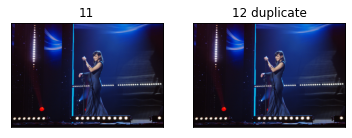

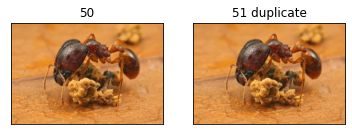

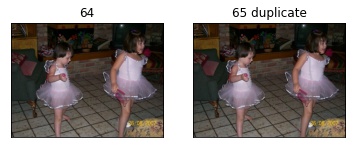

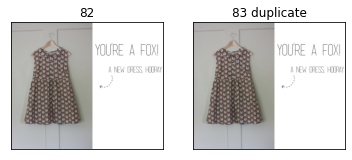

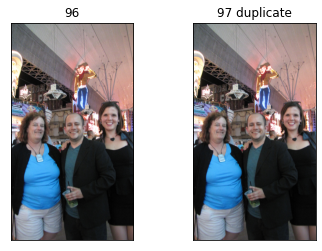

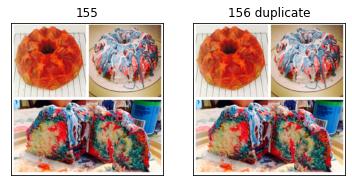

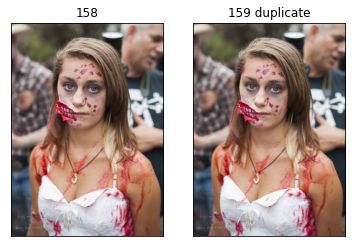

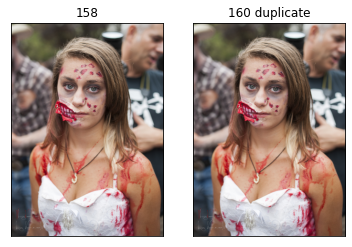

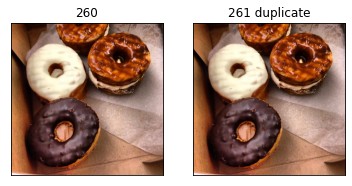

In [111]:
for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(imread(files_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(files_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue 

In [112]:
for index in duplicates:
    os.remove(files_list[index[0]])

In [114]:

import hashlib
from imageio import imread
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time
import numpy as np

def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()
    

os.chdir('C:/Users/soff1/Desktop/data')
os.getcwd()

  
    
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))
        

In [115]:
duplicates

[]

### _Brightness

In [2]:

#COMMON OBJECTS - SHAPES - NUMBERS - ALPHABETS

import os
import pandas as pd
import numpy as np
from PIL import Image
from PIL import ImageEnhance
from matplotlib import pyplot as plt
from tqdm import tqdm


from sklearn.preprocessing import LabelBinarizer

import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

root_dir ="C:/Users/soff1/Desktop/Nouveaudossier - Copie/" 
# get all the folder paths
all_paths = os.listdir(root_dir)

# create a DataFrame
dataprep = pd.DataFrame()

images = []
labels = []
counter = 0
V=""
for folder_path in tqdm(all_paths, total=len(all_paths)):
    # get all the image names in the particular folder
    image_paths = os.listdir(f"{root_dir}/{folder_path}")
  
    
        
        
    # save image paths in the DataFrame
    for image_pathh in image_paths:
        if image_pathh.split('.')[-1] == 'jpg':
            image_path=image_pathh.replace('.jpg','')
            Image=load_img("C:/Users/soff1/Desktop/Nouveaudossier - Copie/"+folder_path+'/'+image_pathh)
            image_color_enhan=Image.copy()
            Image_rotate90=Image.rotate(90).save("C:/Users/soff1/Desktop/Nouveaudossier - Copie/"+folder_path+'/'+image_path+'_rot90.jpg')
            Image_rotate180=Image.rotate(180).save("C:/Users/soff1/Desktop/Nouveaudossier - Copie/"+folder_path+'/'+image_path+'_rot180.jpg')
            Image_rotateminus90=Image.rotate(-90).save("C:/Users/soff1/Desktop/Nouveaudossier - Copie/"+folder_path+'/'+image_path+'_min90.jpg')
            ImageBrightness=ImageEnhance.Brightness(image_color_enhan).enhance(0.75).save("C:/Users/soff1/Desktop/Nouveaudossier - Copie/"+folder_path+'/'+image_path+'_Brightness.jpg')
            ImageSharpness=ImageEnhance.Sharpness(image_color_enhan).enhance(2.5).save("C:/Users/soff1/Desktop/Nouveaudossier - Copie/"+folder_path+'/'+image_path+'_Sharpness.jpg')
           
           
        
       
       

 


100%|████████████████████████████████████████████████████████████████████████████████| 310/310 [57:06<00:00, 11.05s/it]


In [5]:

#SIGN LANGUAGE

import os
import pandas as pd
import numpy as np
from PIL import Image
from PIL import ImageEnhance
from matplotlib import pyplot as plt
from tqdm import tqdm


from sklearn.preprocessing import LabelBinarizer

import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

root_dir ="C:/Users/soff1/Desktop/esprit/4eme/semestre2/pi/genical/dataset/Sign Language - Copie" 
# get all the folder paths
all_paths = os.listdir(root_dir)

# create a DataFrame
datasignprep = pd.DataFrame()

images = []
labels = []
counter = 0
V=""
for folder_path in tqdm(all_paths, total=len(all_paths)):
    # get all the image names in the particular folder
    image_paths = os.listdir(f"{root_dir}/{folder_path}")
    

        
        
    # save image paths in the DataFrame
    for image_pathh in image_paths:
        if image_pathh.split('.')[-1] == 'jpg':
            image_path=image_pathh.replace('.jpg','')
            Image=load_img("C:/Users/soff1/Desktop/esprit/4eme/semestre2/pi/genical/dataset/Sign Language - Copie/"+folder_path+'/'+image_pathh)
            image_color_enhan=Image.copy()
            Image_rotate90=Image.rotate(90).save("C:/Users/soff1/Desktop/esprit/4eme/semestre2/pi/genical/dataset/Sign Language - Copie/"+folder_path+'/'+image_path+'_rot90.jpg')
            Image_rotate180=Image.rotate(180).save("C:/Users/soff1/Desktop/esprit/4eme/semestre2/pi/genical/dataset/Sign Language - Copie/"+folder_path+'/'+image_path+'_rot180.jpg')
            Image_rotateminus90=Image.rotate(-90).save("C:/Users/soff1/Desktop/esprit/4eme/semestre2/pi/genical/dataset/Sign Language - Copie/"+folder_path+'/'+image_path+'_min90.jpg')
            ImageBrightness=ImageEnhance.Brightness(image_color_enhan).enhance(0.75).save("C:/Users/soff1/Desktop/esprit/4eme/semestre2/pi/genical/dataset/Sign Language - Copie/"+folder_path+'/'+image_path+'_Brightness.jpg')
            ImageSharpness=ImageEnhance.Sharpness(image_color_enhan).enhance(2.5).save("C:/Users/soff1/Desktop/esprit/4eme/semestre2/pi/genical/dataset/Sign Language - Copie/"+folder_path+'/'+image_path+'_Sharpness.jpg')
           
           
        
       


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [13:14<00:00, 16.56s/it]


### blur

In [1]:
#BLUR common objects

import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer
import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import cv2

root_dir ="C:/Users/soff1/Desktop/Nouveaudossier" 
# get all the folder paths
all_paths = os.listdir(root_dir)

blur=10000

#Parcourir les dossiers
for folder_path in tqdm(all_paths, total=len(all_paths)):
    # get all the image names in the particular folder
    
    image_paths = os.listdir(f"{root_dir}/{folder_path}")
    if 'Label' in image_paths:
        image_paths.remove('Label')
     

    #recognize images and save image paths in the DataFrame
    for image_path in image_paths:
    
         
        Image = load_img("C:/Users/soff1/Desktop/Nouveaudossier/"+folder_path+'/'+image_path)
        image = np.array(Image)
        blurry=cv2.Laplacian(image, cv2.CV_64F).var()
        if blurry < blur:
            blur=blurry


            
print(blur)

100%|████████████████████████████████████████████████████████████████████████████████| 307/307 [26:11<00:00,  5.12s/it]

1.390309969379511


In [8]:
#BLUR common objects

import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer
import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import cv2

root_dir ="C:/Users/soff1/Desktop/Nouveaudossier" 
# get all the folder paths
all_paths = os.listdir(root_dir)

blur=1
x=0

#Parcourir les dossiers
for folder_path in tqdm(all_paths, total=len(all_paths)):
    # get all the image names in the particular folder
    
    image_paths = os.listdir(f"{root_dir}/{folder_path}")
    if 'Label' in image_paths:
        image_paths.remove('Label')
     

    #recognize images and save image paths in the DataFrame
    for image_path in image_paths:
    
         
        Image = load_img("C:/Users/soff1/Desktop/Nouveaudossier/"+folder_path+'/'+image_path)
        image = np.array(Image)
        blurry=cv2.Laplacian(image, cv2.CV_64F).var()
        if (blurry > blur):
            blur=blurry
        if(blurry <20):
            print("C:/Users/soff1/Desktop/Nouveaudossier/"+folder_path+'/'+image_path)
             
            os.remove("C:/Users/soff1/Desktop/Nouveaudossier/"+folder_path+'/'+image_path)

            

            


  1%|▊                                                                                 | 3/307 [00:01<02:48,  1.80it/s]

C:/Users/soff1/Desktop/Nouveaudossier/Ant/001d7dd6664f5307.jpg


  2%|█▎                                                                                | 5/307 [00:05<06:38,  1.32s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Apple/01968ea73417ec3b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Apple/01ecc03a12e21e39.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Apple/038c85427cb3c264.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Apple/03bfc0b1cc6bde63.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Apple/05700e985231e8cf.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Apple/05aa7c4e2b949291.jpg


  2%|█▌                                                                                | 6/307 [00:09<10:04,  2.01s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Apple/0656e14f3c0807d4.jpg


  2%|█▊                                                                                | 7/307 [00:09<07:36,  1.52s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Auto part/0086aa9813048b1d.jpg


  3%|██▍                                                                               | 9/307 [00:15<10:01,  2.02s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Axe/0304ad7f7fe22b23.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Backpack/0225e558e7150eb1.jpg


  3%|██▋                                                                              | 10/307 [00:21<15:34,  3.15s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Bagel/00d7400989d15a1e.jpg


  4%|██▉                                                                              | 11/307 [00:22<12:02,  2.44s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Baked goods/007f32093dcef9d8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Baked goods/0183b570f6ddfb85.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Baked goods/0230cad0b6b5738f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Baked goods/052773fa5798e307.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Baked goods/0575878dc038feaa.jpg


  4%|███▏                                                                             | 12/307 [00:29<18:38,  3.79s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Baked goods/06a53a2790a1e043.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ball/006089650a0a127f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ball/029cb8d91fa1aa9a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ball/05482a4008b39b2d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ball/0634bad6169847fe.jpg


  4%|███▍                                                                             | 13/307 [00:35<22:41,  4.63s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Balloon/0016f577f9811ad3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Balloon/0023b0e23b369b8d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Balloon/009b073352a6230a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Balloon/00accaa1ed88c94e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Balloon/01209276c1f549e9.jpg


  5%|███▋                                                                             | 14/307 [00:42<25:44,  5.27s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Banana/031b15ab26ce3cdd.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Banana/03b294f390127251.jpg


  5%|████▏                                                                            | 16/307 [00:44<15:07,  3.12s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Baseball bat/034c72ca554d332d.jpg


  6%|████▍                                                                            | 17/307 [00:49<17:23,  3.60s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Baseball glove/038caf62283b72ce.jpg


  6%|████▋                                                                            | 18/307 [00:56<21:53,  4.54s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Bat/0098b6751cfd525e.jpg


  7%|█████▎                                                                           | 20/307 [00:57<12:21,  2.58s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Bathtub/00514c0fd0a7209a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bathtub/022c31a09d9e947d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bathtub/037487f1842394fd.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bathtub/043848d8e64acb9f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bathtub/055fd87f4f8b6c7a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bathtub/0610fe0af52c606d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bathtub/0612bab38816b4d7.jpg


  7%|██████                                                                           | 23/307 [01:01<07:51,  1.66s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Bed/00a011ef968db10b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bed/015debd57b1ab61e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bed/017fc8253a592d65.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bed/0227850e15b6cec8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bed/026319ec416e1d12.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bed/03de9e29dfe01fb6.jpg


  8%|██████▎                                                                          | 24/307 [01:08<15:33,  3.30s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Bed/0675bfeb61209ae6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bed/06a1b42ff10a797c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bee/002193b116eaf701.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bee/004ed5f459770c45.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bee/013a8e1af1e61df1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bee/01a74201954ad865.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bee/01fcdb0f4ddcd3ef.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bee/0295ce08f56685b6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bee/035ddba98849c8be.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bee/039d873e94a9f19a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bee/039dbc5908362664.jpg


  8%|██████▌                                                                          | 25/307 [01:15<20:31,  4.37s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Beer/001f3b8c1543d83f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Beer/03b35fdc7e040e07.jpg


  9%|███████                                                                          | 27/307 [01:23<17:57,  3.85s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Belt/0324196fd6335e1a.jpg


  9%|███████▍                                                                         | 28/307 [01:24<13:42,  2.95s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Belt/06291e67eefbd08b.jpg


  9%|███████▋                                                                         | 29/307 [01:30<18:37,  4.02s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Bicycle helmet/03aff911ebaa714f.jpg


 10%|████████▏                                                                        | 31/307 [01:46<28:00,  6.09s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Bird/00652239a1aad225.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bird/00ec4c7d3fad1fc5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bird/02adaa4808969cdb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bird/03582779fbf0aaf7.jpg


 10%|████████▍                                                                        | 32/307 [01:55<31:44,  6.93s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Bird/065ded5953cf6e6b.jpg


 11%|████████▋                                                                        | 33/307 [01:55<22:44,  4.98s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Blender/04c3bbca080a3e29.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Boat/0055180b3b3f0677.jpg


 11%|████████▉                                                                        | 34/307 [02:03<26:21,  5.79s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Book/0013ea115f7aed08.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Book/00672781f5b86966.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Book/026dfa7371ee747c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Book/029425f0b19a4895.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Book/0526f38f92b28993.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Book/05ebb5db6d9e8214.jpg


 11%|█████████▏                                                                       | 35/307 [02:10<28:11,  6.22s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Bookcase/05ebb5db6d9e8214.jpg


 12%|█████████▍                                                                       | 36/307 [02:17<29:17,  6.48s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Bottle/011bd38e7739d91b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bottle/0130fdef839b46d8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bottle/044d4e8762f2c8bc.jpg


 13%|██████████▎                                                                      | 39/307 [02:25<21:13,  4.75s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Bow and arrow/05b2a8682bfb72a2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bowl/00db3a2385bb3cc8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bowl/027b351e2bfdfaa3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bowl/02e9e4e3ae090013.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bowl/036c291d70c6298f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bowl/03f26e4b23058600.jpg


 13%|██████████▌                                                                      | 40/307 [02:30<21:34,  4.85s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Box/008ed63d064676f1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Box/00ed67e74705df5b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Box/02a04a171360add2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Box/0532bebe983fa773.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Box/06504c13f153b290.jpg


 13%|██████████▊                                                                      | 41/307 [02:37<24:09,  5.45s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Boy/016f4c8f4b06a18d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Boy/01a32dd06f697f8b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Boy/03e08a1997e2a12c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Boy/040a358d12915247.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Boy/04480b006b2d5bd4.jpg


 14%|███████████                                                                      | 42/307 [02:44<25:41,  5.82s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Boy/0675bfeb61209ae6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bread/014383a67b29bb20.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bread/01bab6819fb481cc.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bread/0290db4f27e7a332.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bread/02a46a5271b03a39.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bread/05a6358122ef4cff.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Bread/06088855234d2579.jpg


 15%|████████████▏                                                                    | 46/307 [02:53<12:09,  2.79s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Bull/0490c5c867d12adf.jpg


 16%|████████████▉                                                                    | 49/307 [03:05<17:11,  4.00s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Butterfly/00b5efe3b93fdbe1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Butterfly/03af1f0521c9df7d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Butterfly/0404a92a19e99c11.jpg


 16%|█████████████▏                                                                   | 50/307 [03:13<21:05,  4.93s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cabbage/019a4729783c6272.jpg


 17%|█████████████▍                                                                   | 51/307 [03:14<16:44,  3.92s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cake/006141259fecc5b0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cake/00ceaf0a8030a8ae.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cake/012a3b47f7df3b52.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cake/01f70b40e53bf882.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cake/0230cad0b6b5738f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cake/03b7d3f5dc4f7a5b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cake/04b9582c0f0ac86e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cake/063dcaa7beefdee9.jpg


 17%|█████████████▋                                                                   | 52/307 [03:21<20:24,  4.80s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cake stand/063dcaa7beefdee9.jpg


 18%|██████████████▏                                                                  | 54/307 [03:23<12:12,  2.89s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Camera/0002a1a755d730ca.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Camera/0042ccc1a1e60cad.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Camera/00b58edea28e40c1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Camera/00cf4b9781793e0e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Camera/01e0fcad0c694074.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Camera/060cdfc5261d7ffb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Camera/0639d0d51bf59193.jpg


 18%|██████████████▊                                                                  | 56/307 [03:34<15:49,  3.78s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Canary/0699ed523338d952.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Candle/002736cf7e4b6837.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Candle/004872ce5b7a39ea.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Candle/01193e0444f302b7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Candle/0145cc2cac79288e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Candle/01b7012c930c7d5b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Candle/02aa1cba7d9bd930.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Candle/03565dfeeacd5ffc.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Candle/051c3be1a90f1440.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Candle/060753241ea682d9.jpg


 19%|███████████████                                                                  | 57/307 [03:39<17:17,  4.15s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Candle/067846561120cf67.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Candy/0015df57518d6a1b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Candy/03fc655275c9c24d.jpg


 20%|███████████████▊                                                                 | 60/307 [03:52<18:11,  4.42s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Carrot/03c1f1b92406f3b8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Carrot/0543e853b727c866.jpg


 20%|████████████████▎                                                                | 62/307 [03:58<16:26,  4.03s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Castle/0252e4d0558cf755.jpg


 21%|████████████████▌                                                                | 63/307 [04:06<20:18,  4.99s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cat/00a076964e23b643.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cat/00a7fde5a94563a1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cat/00cfb99c0cd105dc.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cat/0111d0f0dd17147e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cat/014492587561673c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cat/017fc8253a592d65.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cat/0390c9f8722b4f55.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cat/03f49f7941793618.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cat/0469ccb7fbde102d.jpg


 21%|████████████████▉                                                                | 64/307 [04:13<22:54,  5.66s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Caterpillar/0205c03a176c6f32.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Caterpillar/03c9e3ecdb8e75e9.jpg


 21%|█████████████████▍                                                               | 66/307 [04:22<21:29,  5.35s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Chair/0118a8161ca6cb6b.jpg


 22%|█████████████████▋                                                               | 67/307 [04:31<25:53,  6.47s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cheese/0104523b86b2a694.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cheese/0187d91418100b9a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cheese/049e708966e88372.jpg


 22%|█████████████████▉                                                               | 68/307 [04:34<21:05,  5.30s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cheese/06329e8f09f55168.jpg


 22%|██████████████████▏                                                              | 69/307 [04:37<19:16,  4.86s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Chicken/068a34748343d060.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Chopsticks/027b351e2bfdfaa3.jpg


 23%|██████████████████▋                                                              | 71/307 [04:46<18:45,  4.77s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Clock/015fbcebae90bee0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Clock/0225794adb189f43.jpg


 24%|███████████████████▎                                                             | 73/307 [04:51<13:26,  3.45s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Clothing/016f4c8f4b06a18d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Clothing/0609e04aa7f6dbe3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Clothing/0675bfeb61209ae6.jpg


 24%|███████████████████▌                                                             | 74/307 [04:57<16:54,  4.36s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Coat/000b87119cc301cf.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coat/004f45f657786da9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coat/00dc47b29c30b9bf.jpg


 24%|███████████████████▊                                                             | 75/307 [05:04<19:48,  5.12s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cocktail/0051805f87a055f0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cocktail/0067ba64819f6a8f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cocktail/00c73dd06592dd70.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cocktail/016c7526835c386e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cocktail/02312ccb8c2c9ea3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cocktail/05fdf749631fd920.jpg


 25%|████████████████████▎                                                            | 77/307 [05:12<16:39,  4.35s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Coffee/005f8e94925115d6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee/01b57387b0ce9e65.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee/01ddde4d33840277.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee/02b34f641854be6c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee/02e3c2e16589378e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee/03cbb90002e2e200.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee/05e62136d2738172.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee/0607a0b5ae62e8ee.jpg


 25%|████████████████████▌                                                            | 78/307 [05:18<18:21,  4.81s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Coffee/0649cda62c2e03c2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee/06835a1e7f04dac0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee cup/01ddde4d33840277.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee cup/025848d98ae29525.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee cup/0283104d36470fd6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee cup/02b34f641854be6c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee cup/02e3c2e16589378e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee cup/03e390cd1ce28a58.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee cup/043167c91a78d444.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee cup/04b91d1491812ee7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee cup/05e62136d2738172.jpg


 26%|████████████████████▊                                                            | 79/307 [05:25<20:24,  5.37s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Coffee cup/06835a1e7f04dac0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee table/0118a8161ca6cb6b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Coffee table/04279b9fb55eef58.jpg


 26%|█████████████████████▎                                                           | 81/307 [05:31<15:30,  4.12s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Coin/055966467ad4db23.jpg


 27%|█████████████████████▉                                                           | 83/307 [05:35<10:16,  2.75s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Computer keyboard/003d781673058c75.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Computer keyboard/0323506fd3178dc8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Computer keyboard/04cd6ff7c8b33ad1.jpg


 27%|██████████████████████▏                                                          | 84/307 [05:41<14:20,  3.86s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Computer monitor/003d781673058c75.jpg


 28%|██████████████████████▍                                                          | 85/307 [05:48<17:15,  4.67s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Computer mouse/00150e654b054faa.jpg


 28%|██████████████████████▋                                                          | 86/307 [05:50<14:09,  3.84s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cookie/014383a67b29bb20.jpg


 28%|██████████████████████▉                                                          | 87/307 [05:52<12:33,  3.42s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cosmetics/0130fdef839b46d8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cosmetics/01cdd00a3bd993b9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cosmetics/02080baccb392a5a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cosmetics/02efef3e3574a141.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cosmetics/0329160e83afa6df.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cosmetics/03414c43b26c4bae.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cosmetics/043261026a460fbd.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cosmetics/0479b4ef2e98a878.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cosmetics/059a893bb2031fae.jpg


 29%|███████████████████████▏                                                         | 88/307 [05:55<12:16,  3.36s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cosmetics/067562644b03f407.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Couch/046a1e2aa5f9f610.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Couch/0498273bba433a85.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Couch/06196898fd94906e.jpg


 29%|███████████████████████▍                                                         | 89/307 [06:01<14:38,  4.03s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Countertop/0076f6b7192586ac.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Countertop/02a66efd7c9bf7db.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Countertop/04bc36e436756b2e.jpg


 29%|███████████████████████▋                                                         | 90/307 [06:09<19:00,  5.26s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cowboy hat/007eb9df85b0f752.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cowboy hat/01574a4d86822308.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cowboy hat/0407ba73e2b13ef7.jpg


 31%|████████████████████████▊                                                        | 94/307 [06:17<10:47,  3.04s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cricket ball/0228135878aee48c.jpg


 32%|█████████████████████████▊                                                       | 98/307 [06:22<05:51,  1.68s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Cucumber/066054cae75ea053.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Cutting board/010dce7cb9251d5e.jpg


 32%|██████████████████████████                                                       | 99/307 [06:23<05:16,  1.52s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Deer/0024e99f9dfdcf09.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Deer/03ca54898916d7da.jpg


 33%|██████████████████████████▎                                                     | 101/307 [06:36<14:04,  4.10s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Dessert/00bb61eb8a436347.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dessert/00d97af2a89e28e7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dessert/01ecc03a12e21e39.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dessert/0353c026e9199d29.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dessert/03d6bc23bb972746.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dessert/0446003bdde11db3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dessert/04ce6901b379f1a6.jpg


 34%|███████████████████████████▎                                                    | 105/307 [06:44<06:37,  1.97s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Dinosaur/04adc8c1e834630d.jpg


 35%|███████████████████████████▉                                                    | 107/307 [06:48<05:51,  1.76s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Dog/0104ed24ce594848.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dog/0122c779121de8a2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dog/032703c3830c4071.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dog/0351523802633812.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dog/048ab5df6756df78.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dog/04aaee59bea90cef.jpg


 35%|████████████████████████████▏                                                   | 108/307 [06:55<10:48,  3.26s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Dog bed/022de37930ca27eb.jpg


 36%|████████████████████████████▍                                                   | 109/307 [06:56<08:57,  2.72s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Doll/0014ca12f4d5c614.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Doll/00a9578d5eac66db.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Doll/01d3c1bab5a84833.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Doll/020a09984ec3a7c0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Doll/028acb0678457b6f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Doll/03e965182d7af27d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Doll/059fa987847ebe86.jpg


 36%|████████████████████████████▋                                                   | 110/307 [07:03<13:01,  3.97s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Dolphin/018da61aa89c92d1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dolphin/02e80a3beca944f5.jpg


 36%|████████████████████████████▉                                                   | 111/307 [07:05<10:44,  3.29s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Door/03d6b1bb489f8731.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Door/0622c7d3da51c473.jpg


 36%|█████████████████████████████▏                                                  | 112/307 [07:11<13:42,  4.22s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Door handle/012778cd3036656d.jpg


 37%|█████████████████████████████▍                                                  | 113/307 [07:13<11:24,  3.53s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Doughnut/00d7400989d15a1e.jpg


 37%|█████████████████████████████▉                                                  | 115/307 [07:18<10:23,  3.25s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Dress/0366906421192ca6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Dress/0442c3dd1657dd75.jpg


 38%|██████████████████████████████▏                                                 | 116/307 [07:25<13:23,  4.21s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Dress/065abdbee4dc82ff.jpg


 38%|██████████████████████████████▍                                                 | 117/307 [07:25<09:36,  3.03s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Drink/0175c0aef4065588.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Drink/044d4e8762f2c8bc.jpg


 38%|██████████████████████████████▋                                                 | 118/307 [07:32<13:05,  4.15s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Drinking straw/007145912c46c52d.jpg


 39%|███████████████████████████████▎                                                | 120/307 [07:39<13:03,  4.19s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Duck/01de8a757312655d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Duck/01fe4546ccf52c23.jpg


 39%|███████████████████████████████▌                                                | 121/307 [07:46<15:19,  4.94s/it]

C:/Users/soff1/Desktop/Nouveaudossier/egg/0a4a02bd541372f6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/egg/0c1ffd2ce00aa881.jpg
C:/Users/soff1/Desktop/Nouveaudossier/egg/31b3553ce116ed1a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/egg/60d807f7f5afe2b3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/egg/ba27c89cf3244a24.jpg
C:/Users/soff1/Desktop/Nouveaudossier/egg/c14c9b67d819704f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/egg/c6d41ecd037e8b18.jpg


 40%|███████████████████████████████▊                                                | 122/307 [07:53<17:08,  5.56s/it]

C:/Users/soff1/Desktop/Nouveaudossier/envelope/5569724fc69793f3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/envelope/584aff5168b0c05c.jpg


 40%|████████████████████████████████                                                | 123/307 [07:56<14:46,  4.82s/it]

C:/Users/soff1/Desktop/Nouveaudossier/eraser/03fc655275c9c24d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/eraser/10a79e15508daa7d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/eraser/265215a6a52230df.jpg


 40%|████████████████████████████████▎                                               | 124/307 [07:57<11:00,  3.61s/it]

C:/Users/soff1/Desktop/Nouveaudossier/eraser/c0c8fd2d3219ed36.jpg
C:/Users/soff1/Desktop/Nouveaudossier/eraser/efa0605194b3740b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Fireplace/2f5e7f6cc9ec4a1e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Fireplace/430e8aa3b8a95872.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Fireplace/7c4ce9b7676cfbc4.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Fireplace/ac7c390149853277.jpg


 41%|████████████████████████████████▌                                               | 125/307 [08:04<13:49,  4.56s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Fish/032c97ce8e577c95.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Fish/d758dfd3e70fbfa3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Fish/d8cbe3ea680aa5d6.jpg


 41%|████████████████████████████████▊                                               | 126/307 [08:10<15:42,  5.21s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Flag/13d30e8c38094f82.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Flag/b907ce84318ab706.jpg


 41%|█████████████████████████████████                                               | 127/307 [08:17<16:36,  5.53s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Flashlight/00c3ebb7831b832f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Flashlight/0b2ecd8bae092a65.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Flashlight/c90070c66c550929.jpg


 42%|█████████████████████████████████▎                                              | 128/307 [08:19<13:33,  4.55s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Flower/0a74794c5237e03f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Flower/0d5da807329a82d7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Flower/181c80c0fa45cab4.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Flower/bee118a8e5876720.jpg


 42%|█████████████████████████████████▌                                              | 129/307 [08:26<15:23,  5.19s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Flowerpot/dee8aff5c281ac55.jpg


 42%|█████████████████████████████████▉                                              | 130/307 [08:33<16:58,  5.75s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Football/25b787786f462c69.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Football/f191fb1aaca77b65.jpg


 43%|██████████████████████████████████▏                                             | 131/307 [08:40<17:45,  6.05s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Fork/026e1a15f466019d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Fork/0493fd56662e0c3d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Fork/1bea809ab50ecd02.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Fork/21c92e94b19b7d60.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Fork/2e21a9cd746452b9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Fork/45dad4edc865e99c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Fork/af268d1cd16df557.jpg


 43%|██████████████████████████████████▍                                             | 132/307 [08:46<18:21,  6.29s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Fruit/81bc5cb22013112e.jpg


 43%|██████████████████████████████████▋                                             | 133/307 [08:53<18:22,  6.34s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Furniture/060282a1b4749e32.jpg


 44%|██████████████████████████████████▉                                             | 134/307 [09:00<18:45,  6.51s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Glasses/26a0ddef2935c347.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Glasses/6c7083b221eb2ccb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Glasses/a582467757981edc.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Glasses/b0e56b0414748efd.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Glasses/cdf2dbb5ef1a55d7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Glasses/de01f146326a57cf.jpg


 44%|███████████████████████████████████▏                                            | 135/307 [09:07<18:53,  6.59s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Glove/01bb292beb95566e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Glove/11f1d0ee021ae986.jpg


 44%|███████████████████████████████████▍                                            | 136/307 [09:13<18:37,  6.53s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Grape/0cf98cfa41c1ea17.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Grape/12182714a1743744.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Grape/610fc0990dd8a3c9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Grape/b2bcf5fbd48e4a29.jpg


 45%|███████████████████████████████████▋                                            | 137/307 [09:19<18:21,  6.48s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Grapefruit/00381f14f52c710e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Grapefruit/129c8db1b1345bf5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Grapefruit/1abdf15ec02e1a1d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Grapefruit/1c06c93eb48ff8ef.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Grapefruit/2d9d70fcb20e6c36.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Grapefruit/3bd689663f0033e5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Grapefruit/4ed695d78864c4e8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Grapefruit/b4029a7f7e392e2d.jpg


 45%|███████████████████████████████████▉                                            | 138/307 [09:26<18:15,  6.49s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Grapefruit/ffa29be6ba773b5e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Guitar/c96c6c57f6e9c86f.jpg


 45%|████████████████████████████████████▏                                           | 139/307 [09:33<18:38,  6.66s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Hamster/1f76e1e2b3065acf.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Hamster/20adb006e76d3603.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Hamster/20c5ece3639202b3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Hamster/2abb8abaa100b05a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Hamster/a2901670e3eedfea.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Hamster/c53ce7dbef6ec36f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Hamster/f29e42e4f18e6427.jpg


 46%|████████████████████████████████████▍                                           | 140/307 [09:40<18:35,  6.68s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Hamster/fa8649008c8d73fe.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Handbag/0057224124fe62c6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Handbag/2c0c767560219082.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Handbag/95e1e109008905e0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Handbag/d9680a08764cf134.jpg


 46%|████████████████████████████████████▋                                           | 141/307 [09:46<18:08,  6.56s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Hat/4b9ed3cc55546abe.jpg


 46%|█████████████████████████████████████                                           | 142/307 [09:52<17:53,  6.50s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Headphones/01d5dfc705ab4a2b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Headphones/2228229c8133a7e5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Headphones/24bd333f4322a420.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Headphones/786af6f7512fefa6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Headphones/a33d7dc89f411013.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Headphones/a868fc14043436af.jpg


 47%|█████████████████████████████████████▎                                          | 143/307 [09:59<17:37,  6.45s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Houseplant/2b8f34b4cbc3b305.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Houseplant/587df9559e4862f2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Houseplant/5c6b22ed99c32b3c.jpg


 47%|█████████████████████████████████████▌                                          | 144/307 [10:05<17:49,  6.56s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/038242033e8a4bae.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/22dc3f1e96b593e1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/35456c106a699724.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/35e9ee688bd38fd4.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/3f3ba1edd72f1227.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/46d948fa849b4cdb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/4f28a31461581f24.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/559e47bc0fe3f568.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/62499f839d77cee2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/6487805116a9ac38.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/69fbb103a07924f1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/706737418377192e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/794e8c6265bd5eb1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ice cream/81b4cb9eb30ef616.jpg
C:/Users/soff1/Desktop/Nouveaudoss

 47%|█████████████████████████████████████▊                                          | 145/307 [10:18<22:36,  8.37s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Infant bed/0625223caca5848b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Infant bed/0b19c40384c65c69.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Infant bed/13fc461f03316ccb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Infant bed/225fe44cb5ba4021.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Infant bed/34c2bdee8d12d8f4.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Infant bed/538f94b83a1cd284.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Infant bed/747d65b6dc6a2aaa.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Infant bed/942530b8ce6769ce.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Infant bed/c48873a5b49b7338.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Infant bed/d6446ce80aabbdfa.jpg


 48%|██████████████████████████████████████                                          | 146/307 [10:24<20:47,  7.75s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Infant bed/f8065cdfa3b1d40e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Insect/1ff4c795f9cb995f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Insect/47725237117fd292.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Insect/5149d08e3668f0e1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Insect/78205250522ea6b3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Insect/a954f06127da34c5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Insect/ac0acd2c9cebc636.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Insect/c2d72a63e75fcbac.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Insect/c7e7739b7b3170de.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Insect/ce1126b601b548f8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Insect/e4e4e209ab51a77d.jpg


 48%|██████████████████████████████████████▎                                         | 147/307 [10:31<19:38,  7.37s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Ipod/08f7dfc3fd66568a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/0962975a783ad69b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/0d004153c37b8105.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/1b76190e99bb0a0b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/5bae2e794884fd4b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/673bd29ece0aa99d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/72d25a38bb5e733d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/755b9bf78d569a35.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/b41831f03caef2ab.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/cea180ec08d707d0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/cf157899a6faeaaf.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/ddced1dfb7387c1b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/e9488b5be904e9f2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/edf5fd9ac189fbf6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ipod/ee851974ca0e0c79.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ip

 48%|██████████████████████████████████████▌                                         | 148/307 [10:37<18:44,  7.07s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Jacket/6a34ea9bada43e8b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Jacket/d9386298e9a9235c.jpg


 49%|██████████████████████████████████████▊                                         | 149/307 [10:44<18:06,  6.88s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Jeans/869415d2b84f024d.jpg


 49%|███████████████████████████████████████                                         | 150/307 [10:50<18:01,  6.89s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Jug/040921b91c4279fd.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Jug/06dedee8a42d0314.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Jug/120a75293198a5db.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Jug/1340efd047513225.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Jug/3d38d32a73a9e016.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Jug/4960f0f448aaeb25.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Jug/50c5f7525f190c9a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Jug/c52ad682264f2983.jpg


 49%|███████████████████████████████████████▎                                        | 151/307 [10:57<17:44,  6.82s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Juice/51fb47342771e5e8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Juice/615f3ed260d260c9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Juice/ddf54f16c6bcb040.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Juice/edfde0b5f2ba2dbd.jpg


 50%|███████████████████████████████████████▌                                        | 152/307 [11:04<17:24,  6.74s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Kettle/0694b1891e64df8b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kettle/338d8defbb8eb997.jpg


 50%|███████████████████████████████████████▊                                        | 153/307 [11:11<17:47,  6.93s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Kitchen knife/010dce7cb9251d5e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kitchen knife/18b93a784baa2aed.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kitchen knife/41a4ceb2721b302f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kitchen knife/4a69d38013603046.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kitchen knife/4afb7f9893ea6a11.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kitchen knife/57a9c9cf38969ec9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kitchen knife/80a756d750a89f49.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kitchen knife/d1f476d6469533ed.jpg


 50%|████████████████████████████████████████▏                                       | 154/307 [11:18<17:22,  6.81s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Kite/008b5d9932d88194.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/02a127a7d68864a1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/07a2c473d03c67d6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/07cc202ea52533bb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/0ffc777bbe764eeb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/15e31735ab5c4aaf.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/4739bd6c8ebf4de6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/53fd3254e4800662.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/b054a55df4f0d65a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/b8c7cec3361f24b9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/bb106d9f87b8b19e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/c44f46527880bbcd.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/d86311e8058deccc.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/da8f9b99cae0c500.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Kite/e85d6727a28d1de7.jpg


 50%|████████████████████████████████████████▍                                       | 155/307 [11:24<16:53,  6.67s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Knife/0304ad7f7fe22b23.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Knife/2c80267c7eec618c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Knife/3244c797f1b257d6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Knife/d1f476d6469533ed.jpg


 51%|████████████████████████████████████████▋                                       | 156/307 [11:30<16:36,  6.60s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Light bulb/017de60c44dc62a9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Light bulb/02ae375292d803e7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Light bulb/0f764725a417793d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Light bulb/2cfb86e58b4a4016.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Light bulb/8e3735d20c5b4b00.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Light bulb/927dc0bb9819b3e5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Light bulb/9e92ef81091719fe.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Light bulb/a1f9f6dccd18f908.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Light bulb/aa3b2ff113e79e54.jpg


 51%|████████████████████████████████████████▉                                       | 157/307 [11:37<16:17,  6.52s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Light bulb/fe724ef7f223af31.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Light switch/21869bf5e8b6b286.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Light switch/aa002b206c310671.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Light switch/e4cc227f299eabfd.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Light switch/e648edaede82cd00.jpg


 51%|█████████████████████████████████████████▏                                      | 158/307 [11:40<13:34,  5.47s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Lily/0532931d342baf86.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lily/066c42c12f367431.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lily/09596bab1c9ef554.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lily/31ec430bce8495a1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lily/39ec4358fb8e4218.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lily/6180eb370c2bff9b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lily/63b604b55f1f8404.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lily/7230ce60a53fb14c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lily/732af78979e2e62b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lily/927fd9b4dd700bb5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lily/96fd7ce8209826f8.jpg


 52%|█████████████████████████████████████████▋                                      | 160/307 [11:55<15:50,  6.46s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Lion/fdb074d32569fb08.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lipstick/1f4d92cc9d89611c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lipstick/27db75bfb91a5377.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lipstick/33fb8a52c92367ce.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lipstick/4a8a893bc6ffa2a5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Lipstick/6c4f11fe814ee09a.jpg


 52%|█████████████████████████████████████████▉                                      | 161/307 [12:02<16:17,  6.69s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Man/12a1ed4865d8d48a.jpg


 53%|██████████████████████████████████████████▏                                     | 162/307 [12:08<16:03,  6.65s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Mango/04d761326c4daeb7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mango/0d59fe8de8a6a4f5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mango/11d0d49a5d7ef328.jpg


 53%|██████████████████████████████████████████▍                                     | 163/307 [12:10<12:11,  5.08s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Measuringcup/03f26e4b23058600.jpg


 53%|██████████████████████████████████████████▋                                     | 164/307 [12:10<08:46,  3.68s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Measuringcup/23bf1f8d4187ec1c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mechanical fan/001175874b0c5f93.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mechanical fan/02c0ee714c745a90.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mechanical fan/0bfca0e79f5490e2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mechanical fan/1aac1f9e2be09b26.jpg


 54%|██████████████████████████████████████████▉                                     | 165/307 [12:16<10:04,  4.26s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Medical equipment/028de494b99a9055.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Medical equipment/0360e4ecb6491b93.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Medical equipment/07511c5e3594b38e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Medical equipment/0c200bc7b3c4f092.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Medical equipment/104519d2ee8f9b1f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Medical equipment/1d125322ee2ceaa4.jpg


 54%|███████████████████████████████████████████▎                                    | 166/307 [12:22<11:11,  4.76s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Medical equipment/2849ec888caa4a40.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Milk/00db3a2385bb3cc8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Milk/026f1a9589e2e1ea.jpg


 54%|███████████████████████████████████████████▌                                    | 167/307 [12:23<08:49,  3.78s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Milk/21d375c76bd42bcb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Milk/25a7bdae7f5541ee.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Milk/281f430c213fac6c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mirror/0068c16e7939d818.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mirror/022c31a09d9e947d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mirror/1b702b564a7770da.jpg


 55%|███████████████████████████████████████████▊                                    | 168/307 [12:30<11:09,  4.82s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Mixer/0428782f4d037d37.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mixer/04c3bbca080a3e29.jpg


 55%|████████████████████████████████████████████                                    | 169/307 [12:32<08:43,  3.79s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Mixing bowl/01ce2cd44f89588e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mixing bowl/027b351e2bfdfaa3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mixing bowl/036c291d70c6298f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mixing bowl/03f26e4b23058600.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mixing bowl/097e0edd6ed34ea4.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mixing bowl/0e8c829aea6be63f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mixing bowl/1560adb68ebc2cbc.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mixing bowl/196ea446e5a562e4.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mixing bowl/1cf07c4f275ade68.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mixing bowl/1e46bbe62a092d3f.jpg


 55%|████████████████████████████████████████████▎                                   | 170/307 [12:39<10:39,  4.67s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Mobile phone/006af52d76f913db.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mobile phone/01df7560c473e1ac.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mobile phone/03ff617e3d5c4de0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mobile phone/060dcd71cd1b09ff.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mobile phone/07ea8a13d5fc9847.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mobile phone/0962975a783ad69b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mobile phone/0bcf8ad31cb54c85.jpg


 56%|████████████████████████████████████████████▌                                   | 171/307 [12:45<11:40,  5.15s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Mobile phone/276f712a246f9742.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Muffin/00c7515143b32051.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Muffin/01f70b40e53bf882.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Muffin/03822e0571376f3a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Muffin/03989048a0ee942d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Muffin/04e06da03377d384.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Muffin/05d8fbdb479c9ff8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Muffin/082f072fdab48924.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Muffin/122fab67906a6135.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Muffin/13fa792c6755ecfd.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Muffin/16f8e17b9521b66f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Muffin/22a26a0238100036.jpg


 56%|████████████████████████████████████████████▊                                   | 172/307 [12:51<12:36,  5.61s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Mug/025848d98ae29525.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mug/0412a90c2c8f331a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mug/0d8d75c987fec39e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mug/0ea10e617f7ad724.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mug/120a75293198a5db.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mug/152d2cc64099b2c3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mug/1a8e5d6512d9e2d8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Mug/22c965ff4d9de968.jpg


 56%|█████████████████████████████████████████████                                   | 173/307 [12:59<13:32,  6.06s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Mug/280d5891e4e4ea8e.jpg


 57%|█████████████████████████████████████████████▎                                  | 174/307 [13:05<13:47,  6.22s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Musical instrument/04ed18f6f912ae46.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Musical instrument/04fbe59338e11436.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Musical instrument/074127de238dfc30.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Musical instrument/0b9b58bc513eca54.jpg


 57%|█████████████████████████████████████████████▌                                  | 175/307 [13:11<13:44,  6.24s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Necklace/03b154c817edf29c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Necklace/242819c8c048d493.jpg


 57%|█████████████████████████████████████████████▊                                  | 176/307 [13:18<14:05,  6.46s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Nightstand/030c7d62604695e4.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Nightstand/03de1489f96579b2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Nightstand/1d9588a8ab66c16e.jpg


 58%|██████████████████████████████████████████████                                  | 177/307 [13:25<13:52,  6.40s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Orange/0290db4f27e7a332.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Orange/051f4d7efa54c5ea.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Orange/06dedee8a42d0314.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Orange/078c09eed41abdaa.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Orange/129c8db1b1345bf5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Orange/1abdf15ec02e1a1d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Orange/24adb2fec4183056.jpg


 59%|██████████████████████████████████████████████▉                                 | 180/307 [13:37<11:50,  5.59s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Oyster/077203b4b1df5449.jpg


 59%|███████████████████████████████████████████████▏                                | 181/307 [13:41<10:45,  5.12s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Paper towel/0028a855a27cf5ce.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Paper towel/016bbd1a28b6672e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Paper towel/0a57ad0ff33edf32.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Paper towel/20b44ff29ddab69b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Paper towel/6403e73ba10c0531.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Paper towel/7d5084edde0b82bf.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Paper towel/7e371d9a43e6b5e6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Paper towel/a7bcffe892296131.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Paper towel/ca474ced913cbdb3.jpg


 59%|███████████████████████████████████████████████▍                                | 182/307 [13:46<10:18,  4.94s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Paper towel/f4f4be8ceed29ac2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pasta/0a2a9d3e3ffe6f26.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pasta/13d5f8205d80485c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pasta/26bc128db30b718e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pasta/e31a7a73831106ad.jpg


 60%|███████████████████████████████████████████████▋                                | 183/307 [13:53<11:29,  5.56s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Pastry/4b1fd27b4a186152.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pastry/4cb1d8d2adc0afac.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pastry/54e193b95da8332a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pastry/89efd0aa0f7576b9.jpg


 60%|███████████████████████████████████████████████▉                                | 184/307 [13:59<11:51,  5.79s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Peach/01968ea73417ec3b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Peach/083fd7de2132871a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Peach/136251d3691284ce.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Peach/1acfd560a4424e04.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Peach/526f4ad5e9aea182.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Peach/544f806ec4d8cd63.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Peach/7d56d0b74d120bba.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Peach/c8ee841a83b43068.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Peach/e30c6fb681ed73b6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Peach/f05400842ae82194.jpg


 60%|████████████████████████████████████████████████▏                               | 185/307 [14:05<12:10,  5.99s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Pear/0794f8d6c6f134af.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/31ca480df8cb589c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/4ced7a8a485a7d8b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/4e4607285b7bb67d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/4ef341ed46459540.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/4f1f7bea757dc8f9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/607d4047a954ba86.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/74be3d2a03d62d04.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/77d35ffcad17a04b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/7a35e157f02bb9e4.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/872438221c0c3610.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/c0ca35085c7bb284.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/d205947006a54575.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/dd597b3d1d410618.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pear/ef4769afe05e0c40.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pe

 61%|████████████████████████████████████████████████▍                               | 186/307 [14:12<12:13,  6.06s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Pen/00118eeac8c3325b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pen/1119292f1319d0dd.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pen/1f08204f6f5a0f2f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pen/30eacf9735b3b48d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pen/53d9727752d17518.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pen/64ecf8e983b98867.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pen/952f3c77749b3565.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pen/c87a5dfb00d919cc.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pen/d8d571736fa0ab7b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pen/e3a0fdfc339d06d7.jpg


 61%|████████████████████████████████████████████████▋                               | 187/307 [14:18<12:18,  6.15s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Pencil case/9b2fbd121b0531bc.jpg


 62%|█████████████████████████████████████████████████▎                              | 189/307 [14:22<07:30,  3.81s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Pencil sharpener/5603699ef458ecbc.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Perfume/0106bcc4ae5781f8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Perfume/3763814d69ce60c0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Perfume/3f54060d41da946c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Perfume/bd5ddd09ecf0adc3.jpg


 62%|█████████████████████████████████████████████████▌                              | 190/307 [14:28<08:51,  4.54s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Perfume/f1573f794a6546d0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Person/114d2da679724b54.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Person/baab994b13a4a1d6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Person/d2214fc478db6d60.jpg


 62%|█████████████████████████████████████████████████▊                              | 191/307 [14:34<09:57,  5.15s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Personal care/0028a855a27cf5ce.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Personal care/0130fdef839b46d8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Personal care/02080baccb392a5a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Personal care/067562644b03f407.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Personal care/0929f6464d011603.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Personal care/323f42c413726877.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Personal care/6109a8a67f38c854.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Personal care/b91eddb8b07f1a75.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Personal care/bc6fc55941b2800c.jpg


 64%|██████████████████████████████████████████████████▊                             | 195/307 [14:45<07:18,  3.91s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Picture frame/0a9946abb78cabe1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Picture frame/9933c103fe9800e9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Picture frame/c85acca243616365.jpg


 64%|███████████████████████████████████████████████████▎                            | 197/307 [14:51<06:48,  3.71s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Pillow/21365229315560fa.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pillow/5f67fe057a779885.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pillow/d2214fc478db6d60.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pillow/e5b2bbe6c3977e41.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pillow/e7d0de93434e07a5.jpg


 64%|███████████████████████████████████████████████████▌                            | 198/307 [14:58<08:15,  4.54s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Pineapple/5554d2c46b699dc2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pineapple/d40181b10cd3d107.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pineapple/e28edd6fb386446d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Pineapple/eec1a034f12e553a.jpg


 65%|███████████████████████████████████████████████████▊                            | 199/307 [15:06<10:00,  5.56s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Racket/698b6d80048e5106.jpg


 69%|██████████████████████████████████████████████████████▉                         | 211/307 [15:13<06:31,  4.08s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Radish/4ae0bbc3bed1bdc4.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Radish/5bc3e03df289a548.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Radish/82aa5f4a71434cbf.jpg


 69%|███████████████████████████████████████████████████████▏                        | 212/307 [15:20<07:36,  4.81s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Refrigerator/1fdd6001d3da9c56.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Refrigerator/4508de4f680374a7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Refrigerator/5f91ad235094ae04.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Refrigerator/edd5af25ce4698c7.jpg


 69%|███████████████████████████████████████████████████████▌                        | 213/307 [15:27<08:42,  5.56s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Remote control/0c07db8faa1a6f44.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Remote control/112e8fc8497d808e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Remote control/11baaefd7c81ec56.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Remote control/2f9bddbb8a615162.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Remote control/50803c8f3fba178c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Remote control/886ab50f6a40004a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Remote control/e4ec77f9402033af.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Remote control/eed71e816bcd23d2.jpg


 70%|████████████████████████████████████████████████████████                        | 215/307 [15:34<06:47,  4.43s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Roller skates/1078e02ad9668586.jpg


 70%|████████████████████████████████████████████████████████▎                       | 216/307 [15:41<07:34,  4.99s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Rose/181acf3d18693d86.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Rose/2a61a487875effe4.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Rose/372f1dd870bc6d1c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Rose/52315d90f5d052b3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Rose/5f6e0afdb28ff18c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Rose/6b418cdfa26a4994.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Rose/6d46ad20208d17eb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Rose/816d27ad6ec55390.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Rose/c9a8d946c3b63e14.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Rose/cfa1c0171414cf46.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Rose/d018f9f44dfa0a9e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Rose/e40e8e36a2c31293.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Rose/f8c4547df7e42ef5.jpg


 71%|████████████████████████████████████████████████████████▌                       | 217/307 [15:48<08:22,  5.58s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Rugby ball/63ea9f347be21a53.jpg


 71%|████████████████████████████████████████████████████████▊                       | 218/307 [15:55<08:49,  5.95s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Ruler/00f445e73466c26a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ruler/4f0fcf3780f6964d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ruler/5ce9d07a617d14b5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ruler/e27bd019fbd5faa2.jpg


 71%|█████████████████████████████████████████████████████████                       | 219/307 [16:01<08:58,  6.12s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Salad/85c1f1a11d62e075.jpg


 72%|█████████████████████████████████████████████████████████▎                      | 220/307 [16:09<09:47,  6.75s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Sandal/1bdb229c00bd6101.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sandal/a3c9205288132474.jpg


 72%|█████████████████████████████████████████████████████████▌                      | 221/307 [16:17<09:57,  6.95s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Sandwich/0269a7ecce257321.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sandwich/0c1f791340124daa.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sandwich/1cf146801835437d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sandwich/5a81a489c8918cb7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sandwich/678340953c1a82bd.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sandwich/828d060a514eea98.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sandwich/cf1f24807a1c5dac.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sandwich/cfd24e4edaba7827.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sandwich/d9f52fd3026fa314.jpg


 72%|█████████████████████████████████████████████████████████▊                      | 222/307 [16:24<10:06,  7.14s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Saucer/05e62136d2738172.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Saucer/082d8ff24c84b4ea.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Saucer/1e1dff3898b3417e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Saucer/82fafb52b4c59954.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Saucer/a3cea1947f3d2993.jpg


 73%|██████████████████████████████████████████████████████████                      | 223/307 [16:33<10:30,  7.50s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Scale/5107aebbeeb7c470.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Scale/6d19f8889da4f29e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Scale/8c0f0382ee8cbcc0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Scale/aa05cc01223ee504.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Scale/ad9a6cd8d0f8116c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Scale/bc8eb68e86ffd250.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Scale/cccf11f038b3ca51.jpg


 73%|██████████████████████████████████████████████████████████▎                     | 224/307 [16:37<09:14,  6.68s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Scale/fece6ea2d5942694.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Scarf/278a542cfa4ea3a2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Scarf/43d9eca23f0cccba.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Scarf/ce439655ad88e083.jpg


 73%|██████████████████████████████████████████████████████████▋                     | 225/307 [16:44<09:03,  6.63s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Scissors/09bab459641be8a3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Scissors/2b1e106c488c0c13.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Scissors/69fff80981062026.jpg


 74%|██████████████████████████████████████████████████████████▉                     | 226/307 [16:50<08:52,  6.57s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Scissors/e95073a8962dbafb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Screwdriver/481f14efd2b4236a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Screwdriver/6b7b9358937fb87a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Screwdriver/96f329e042e6adaf.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Screwdriver/a6cae0a6ad7a8850.jpg


 74%|███████████████████████████████████████████████████████████▏                    | 227/307 [16:52<06:43,  5.04s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Seafood/499b08f61ff402b5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Seafood/63fe3ec4dfdc91b6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Seafood/dadec2f0dba3c528.jpg


 75%|███████████████████████████████████████████████████████████▉                    | 230/307 [17:11<07:29,  5.84s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Shelf/d525b4223ca686e7.jpg


 75%|████████████████████████████████████████████████████████████▏                   | 231/307 [17:17<07:33,  5.96s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Shirt/3e73a8e608b1b2a4.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Shirt/52c8b9c69bcc6ea7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Shirt/8a16f74cc4c24854.jpg


 76%|████████████████████████████████████████████████████████████▍                   | 232/307 [17:23<07:31,  6.03s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Shorts/0f7f479bc47dd495.jpg


 76%|████████████████████████████████████████████████████████████▋                   | 233/307 [17:29<07:32,  6.11s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Shower/022c31a09d9e947d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Shower/1a5554cfae6fddee.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Shower/1ea49d88eb6afbbf.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Shower/22db16fc8e9229cb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Shower/2c51602763118af1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Shower/385361508493ce18.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Shower/6dd876c1b722c0a2.jpg


 76%|████████████████████████████████████████████████████████████▉                   | 234/307 [17:37<07:52,  6.47s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Skateboard/4552f376138fbf6e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Skateboard/e5ec62f57a09c5d8.jpg


 77%|█████████████████████████████████████████████████████████████▏                  | 235/307 [17:44<08:00,  6.67s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Ski/072401a7e2b9b842.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ski/3fea2c8a5fcdcfc8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Ski/723def665cbc25b8.jpg


 77%|█████████████████████████████████████████████████████████████▍                  | 236/307 [17:50<07:49,  6.61s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Skirt/3bae23ad19bba8dd.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Skirt/405c0c13585ad23e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Skirt/8c3cfc03b632ca04.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Skirt/99e41d1e40cc3b2c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Skirt/9f768041933c3fec.jpg


 77%|█████████████████████████████████████████████████████████████▊                  | 237/307 [17:57<07:34,  6.49s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Snack/51f5e81acb66d316.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Snack/52e459a551d4ac2d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Snack/6f6900f02c58d9e9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Snack/8ff8d877aa0139d2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Snack/9734f2365baaaf27.jpg


 78%|██████████████████████████████████████████████████████████████                  | 238/307 [18:03<07:21,  6.40s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Snack/fad92ca4a5ead535.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Snack/ff9ed78d225cb684.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Soap dispenser/589ec6915c40a13a.jpg


 78%|██████████████████████████████████████████████████████████████▎                 | 239/307 [18:05<05:41,  5.01s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Soap dispenser/e45e313e01d2572b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sock/3fb4f6e29d8e7688.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sock/e3066b1d487e3279.jpg


 78%|██████████████████████████████████████████████████████████████▌                 | 240/307 [18:11<06:08,  5.50s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Sofa bed/02b488f4c0b01f89.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sofa bed/1210e2249ac053fb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sofa bed/6aea2824ef1d68d2.jpg


 79%|███████████████████████████████████████████████████████████████                 | 242/307 [18:19<04:55,  4.55s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Spoon/2f34cb432a9f3fc3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Spoon/74993b383a1d2049.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Spoon/79ed97361281befe.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Spoon/cb8c2bfe66dd55fe.jpg


 80%|███████████████████████████████████████████████████████████████▊                | 245/307 [18:39<05:58,  5.79s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Stapler/204e8a14bf357d85.jpg


 80%|████████████████████████████████████████████████████████████████                | 246/307 [18:40<04:34,  4.50s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Stapler/e287a7d3fedeb9e6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Stethoscope/0417a548d8060ca1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Stethoscope/0527bf4bbaadb74c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Stethoscope/0881646a0e326358.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Stethoscope/0cd222b88de89b98.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Stethoscope/be8271051f7f7aca.jpg


 80%|████████████████████████████████████████████████████████████████▎               | 247/307 [18:43<03:53,  3.89s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Stethoscope/ff25cc4c94ae3cc1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Stool/0a42ba7f3f8cc696.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Stool/4bec95cc488ae0b5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Stool/9511922b9f0402de.jpg


 81%|████████████████████████████████████████████████████████████████▋               | 248/307 [18:50<04:48,  4.89s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Strawberry/0c5609f1d88d5550.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Strawberry/26c9bf1f2f1e3be3.jpg


 81%|████████████████████████████████████████████████████████████████▉               | 249/307 [18:57<05:20,  5.52s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Suit/51327be305d55997.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Suit/626793bef9d62ba7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Suit/a8e44e0f95a69714.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Suit/bfd01946701427c6.jpg


 81%|█████████████████████████████████████████████████████████████████▏              | 250/307 [19:04<05:45,  6.06s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Suitcase/05a3d582b430cc4e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Suitcase/0ad22e08682536f8.jpg


 82%|█████████████████████████████████████████████████████████████████▍              | 251/307 [19:12<06:10,  6.62s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Sun hat/01574a4d86822308.jpg


 82%|█████████████████████████████████████████████████████████████████▉              | 253/307 [19:26<06:02,  6.71s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Surfboard/31ccf525b491c47d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Surfboard/c5c80277ee480ca5.jpg


 83%|██████████████████████████████████████████████████████████████████▏             | 254/307 [19:33<05:59,  6.78s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Sushi/008cdd71fb9bba27.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sushi/620a83a88a03ba77.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sushi/81f87851452434f4.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sushi/ab28e89f41b2202f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Sushi/b1e9edd7784e240f.jpg


 83%|██████████████████████████████████████████████████████████████████▍             | 255/307 [19:41<06:15,  7.23s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Swim cap/023d66e5ac8a9fbe.jpg


 84%|██████████████████████████████████████████████████████████████████▉             | 257/307 [19:55<05:52,  7.06s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Tablet computer/185287135046d745.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tablet computer/c83c880fc7b57755.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tablet computer/ccc68746299dc263.jpg


 84%|███████████████████████████████████████████████████████████████████▏            | 258/307 [20:01<05:34,  6.82s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Tart/630d330131fe5d1c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tart/6e0ed6b3d3e4d898.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tart/8f968cb526fd672a.jpg


 84%|███████████████████████████████████████████████████████████████████▍            | 259/307 [20:08<05:24,  6.75s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Tea/03e390cd1ce28a58.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/11c06997d04b49b2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/1e1dff3898b3417e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/2276925ce5b2624b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/28b71ad50504ea46.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/2ec58630a0f8fa42.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/3a1a7b790abae0fe.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/3bbdc16ad8ac2599.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/4a9877ff3eae80b7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/663af44bb985976d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/7039df0e8944cd52.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/7080cfb7926187ad.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/93ec7d093bf7186b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/beed0979456af6e0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/d775315f5a84aca0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tea/e44721fd99d82

 85%|███████████████████████████████████████████████████████████████████▊            | 260/307 [20:15<05:32,  7.08s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Teapot/0694b1891e64df8b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Teapot/15a260db90437b57.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Teapot/91d5ce4f96628252.jpg


 85%|████████████████████████████████████████████████████████████████████            | 261/307 [20:22<05:15,  6.86s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Teapot/f317938c152261b6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Teddy bear/0e1bb9cfdf990f28.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Teddy bear/19c9d6cfc98441b3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Teddy bear/93c2b3b1ab28cadb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Teddy bear/adf85960dccb93b6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Teddy bear/dcd93d040ffb4e91.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Teddy bear/e52a0903c05630e0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Teddy bear/f30171ed53e83609.jpg


 86%|████████████████████████████████████████████████████████████████████▌           | 263/307 [20:35<04:51,  6.63s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Television/052e323423f8f5a1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Television/065fc5f1ce7bdad9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Television/4ecaa85b069837ae.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Television/5724d13453dff201.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Television/66cddaa723656a44.jpg


 86%|████████████████████████████████████████████████████████████████████▊           | 264/307 [20:41<04:38,  6.47s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Tennis ball/2497e41cea655ddc.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tennis ball/3615bbad49f32021.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tennis ball/8ba50fb7f73cf8bc.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tennis ball/8e0f09eafca4ab29.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tennis ball/984f341363e67b17.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tennis ball/ca942cc6ff0024d2.jpg


 86%|█████████████████████████████████████████████████████████████████████           | 265/307 [20:47<04:32,  6.49s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Tiara/5ab5bcdc7a11e5c0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tiara/88b5a62e9dd3a14d.jpg


 87%|█████████████████████████████████████████████████████████████████████▎          | 266/307 [20:54<04:24,  6.45s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Tie/626793bef9d62ba7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tie/bfd01946701427c6.jpg


 87%|█████████████████████████████████████████████████████████████████████▌          | 267/307 [21:00<04:14,  6.37s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Tin can/8d0739b43da4b1b6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tin can/b0ced311d6ec37df.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tin can/bb33fc45966abce0.jpg


 88%|██████████████████████████████████████████████████████████████████████          | 269/307 [21:13<04:00,  6.34s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/016bbd1a28b6672e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/033ed21250a91c08.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/036b5adbc5c06df2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/0a57ad0ff33edf32.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/1680badd9e14c39c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/20b44ff29ddab69b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/4fa78ccda52e9f34.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/7d5084edde0b82bf.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/8eafe2717f816c01.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/a7bcffe892296131.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/ca474ced913cbdb3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/eaa093a3c59344a7.jpg


 88%|██████████████████████████████████████████████████████████████████████▎         | 270/307 [21:19<03:54,  6.33s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Toilet paper/f85b339b1f4b1239.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/01d43b8c07077b72.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/071df7502eb21e66.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/0d7df5d0de19af0f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/1a7a7f04221a2bb3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/615d9b3b7968875c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/64a7da22f0cd5697.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/692f81c800660897.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/87d453765b7dece8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/9211415de69802b2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/9e5c7a2cfb3534e9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/a66230d69cc3887d.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/b0836ed5c2493e5a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Tomato/c47ade156cb40fea.jpg


 89%|██████████████████████████████████████████████████████████████████████▉         | 272/307 [21:32<03:48,  6.52s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Toothbrush/01118f34aacd390f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toothbrush/1a4c60119cc977f6.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toothbrush/2278a496a7945ded.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toothbrush/35f15f61c2bd4e37.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toothbrush/36a03a5a6a4304f2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toothbrush/6e1d07dcda11b6de.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toothbrush/87875066f725d47a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toothbrush/8a95bba76ce043e1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toothbrush/97737c0a315bd4d2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toothbrush/a6a2bde80351e0fa.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toothbrush/b2ba932b3e766098.jpg


 89%|███████████████████████████████████████████████████████████████████████▏        | 273/307 [21:36<03:11,  5.62s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Toothbrush/f05d9835b5280fce.jpg


 89%|███████████████████████████████████████████████████████████████████████▍        | 274/307 [21:36<02:15,  4.10s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Torch/c90070c66c550929.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toy/6df70321d6d7e29e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toy/76ec71b9691ffc7a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toy/85a16fc9d2e69a2e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Toy/a1270e5aaee658f4.jpg


 90%|███████████████████████████████████████████████████████████████████████▉        | 276/307 [21:43<01:58,  3.81s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Trombone/1a21fb0f2a0553a6.jpg


 90%|████████████████████████████████████████████████████████████████████████▏       | 277/307 [21:49<02:13,  4.44s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Trousers/0c8cce4e1da360c7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Trousers/6d8dea2106a556fb.jpg


 91%|████████████████████████████████████████████████████████████████████████▋       | 279/307 [22:01<02:34,  5.50s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Van/023021985507a119.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Van/1c33dea62dbad69a.jpg


 91%|████████████████████████████████████████████████████████████████████████▉       | 280/307 [22:08<02:36,  5.81s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Vase/01ce2cd44f89588e.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Vase/036020268408a1a8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Vase/047c21abe2296d92.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Vase/071a09558b57596b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Vase/0823ecf33bc926c9.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Vase/0a13db8dfe26cfda.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Vase/133f84e15c96a5ca.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Vase/1e999a9b2ec53465.jpg


 92%|█████████████████████████████████████████████████████████████████████████▏      | 281/307 [22:15<02:36,  6.03s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Vegetable/19272a60d721165a.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Vegetable/19e9174edced3f07.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Vegetable/1ed52a163963581d.jpg


 92%|█████████████████████████████████████████████████████████████████████████▍      | 282/307 [22:22<02:40,  6.41s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Violin/0a219f459b869c3c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Violin/1ee887ac0a351423.jpg


 92%|█████████████████████████████████████████████████████████████████████████▋      | 283/307 [22:29<02:37,  6.57s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Volleyball/0cb5aceb33782e9f.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Volleyball/233f9b651f2fb687.jpg


 93%|██████████████████████████████████████████████████████████████████████████      | 284/307 [22:37<02:39,  6.93s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Waffle/03c1f1b92406f3b8.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Waffle/0cca8903e055d340.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Waffle/141323305f5b7360.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Waffle/22dc3f1e96b593e1.jpg


 93%|██████████████████████████████████████████████████████████████████████████▌     | 286/307 [22:40<01:28,  4.20s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Wall clock/09646322663daa99.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Wall clock/15a1d06ac6047b40.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Wall clock/1a14b40a958be934.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Wall clock/1c0e4521810d2113.jpg


 94%|███████████████████████████████████████████████████████████████████████████     | 288/307 [22:49<01:17,  4.06s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Washing machine/08dd4d1137b5ebeb.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Washing machine/1089d6de6e6e3920.jpg


 94%|███████████████████████████████████████████████████████████████████████████▎    | 289/307 [22:52<01:08,  3.80s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Waste container/0b0ec78f51c01396.jpg


 94%|███████████████████████████████████████████████████████████████████████████▌    | 290/307 [22:58<01:17,  4.57s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Watch/09646322663daa99.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Watch/0a0bc91825468c45.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Watch/10029ee551125d37.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Watch/1454efed038e465d.jpg


 95%|███████████████████████████████████████████████████████████████████████████▊    | 291/307 [23:05<01:21,  5.09s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Watercraft/002ea5dc51eb3414.jpg


 95%|████████████████████████████████████████████████████████████████████████████    | 292/307 [23:11<01:20,  5.40s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Watermelon/076d154de54ef212.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Watermelon/0cdd2ef7ba7ffeff.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Watermelon/150f0a9eb7ae754b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Watermelon/1b358cafdd69d5b3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Watermelon/240334243da46a26.jpg


 95%|████████████████████████████████████████████████████████████████████████████▎   | 293/307 [23:16<01:13,  5.26s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Watermelon/28320721b57cc408.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Weapon/21932fd73d3e27f4.jpg


 96%|████████████████████████████████████████████████████████████████████████████▌   | 294/307 [23:22<01:11,  5.48s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Whale/018da61aa89c92d1.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Whale/02e80a3beca944f5.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Whale/0626d3b472b5ff37.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Whale/0c7e78df222cf439.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Whale/0faa5fad1d34416b.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Whale/1b95ac5781268788.jpg


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 296/307 [23:34<01:03,  5.79s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Wheelchair/0664d71b66157748.jpg


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 297/307 [23:40<00:59,  5.96s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Whiteboard/005caff546f21584.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Whiteboard/0082aa3c8046105c.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Whiteboard/0376e7c0565b8a67.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Whiteboard/09a2e4ca8c594916.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Whiteboard/11e02c67fcb29ef7.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Whiteboard/1812168f8a5f1522.jpg


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 299/307 [23:48<00:37,  4.66s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Window/011192c238705975.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Window/0aef442829f42509.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Window/21414307e5fc9776.jpg


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 300/307 [23:54<00:35,  5.10s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Wine/19f90cf8954f72fc.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Wine/1f9e3768c8b05dd1.jpg


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 301/307 [24:01<00:34,  5.71s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Wine glass/0051805f87a055f0.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Wine glass/0bfe6798f749d4f2.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Wine glass/1dd3a574bac9dab8.jpg


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 303/307 [24:09<00:17,  4.47s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Winter melon/1cd7d63a138cff03.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Wok/0101b767f1ea1524.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Wok/06d5c96ca0b541a3.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Wok/0d5c3e635526aee5.jpg


100%|███████████████████████████████████████████████████████████████████████████████▋| 306/307 [24:20<00:03,  3.62s/it]

C:/Users/soff1/Desktop/Nouveaudossier/Zebra/03040ddd02a28c58.jpg
C:/Users/soff1/Desktop/Nouveaudossier/Zebra/07553a6cf8340f36.jpg


100%|████████████████████████████████████████████████████████████████████████████████| 307/307 [24:26<00:00,  4.78s/it]
